In [177]:
using Printf, JLD2
include("../code/headers.jl")

# BP with decimation

## 1. Variables of degree 2

In [182]:
n = 1000
R = 0.3
m = round(Int,n*(1-R))
fg = ldpc_graphGF2(n,m)
H = 1e-5
src = rand((-1,1), n)
fields = tanh.(H*src)
fg.fields .= fields
basis, indep = lightbasis(fg)
freevars = findall(indep);

In [183]:
nunsat, ovl, dist = decimate!(fg, fields, freevars, maxiter=3000, verbose=true, F=1, Tmax=5) 

 Step   0. Free = 300. ε = 1.00E-15. Unsat = 267. Ovl = 0.916. Iters 5
 Step   1. Free = 299. ε = 1.00E-15. Unsat = 267. Ovl = 0.916. Iters 4
 Step   2. Free = 298. ε = 1.00E-15. Unsat = 267. Ovl = 0.916. Iters 3
 Step   3. Free = 297. ε = 1.00E-15. Unsat = 267. Ovl = 0.916. Iters 4
 Step   4. Free = 296. ε = 1.00E-15. Unsat = 267. Ovl = 0.916. Iters 3
 Step   5. Free = 295. ε = 2.00E-20. Unsat = 265. Ovl = 0.914. Iters 4
 Step   6. Free = 294. ε = 2.00E-15. Unsat = 265. Ovl = 0.914. Iters 4
 Step   7. Free = 293. ε = 2.00E-15. Unsat = 265. Ovl = 0.914. Iters 3
 Step   8. Free = 292. ε = 2.00E-20. Unsat = 265. Ovl = 0.914. Iters 3
 Step   9. Free = 291. ε = 1.00E-15. Unsat = 265. Ovl = 0.914. Iters 4
 Step  10. Free = 290. ε = 1.00E-15. Unsat = 265. Ovl = 0.912. Iters 4
 Step  11. Free = 289. ε = 1.02E-20. Unsat = 263. Ovl = 0.910. Iters 4
 Step  12. Free = 288. ε = 1.02E-20. Unsat = 261. Ovl = 0.908. Iters 5
 Step  13. Free = 287. ε = 1.00E-15. Unsat = 261. Ovl = 0.908. Iters 4
 Step 

 Step 161. Free = 139. ε = 3.00E-15. Unsat = 135. Ovl = 0.712. Iters 4
 Step 162. Free = 138. ε = 4.00E-15. Unsat = 135. Ovl = 0.710. Iters 5
 Step 163. Free = 137. ε = 1.00E-15. Unsat = 135. Ovl = 0.710. Iters 3
 Step 164. Free = 136. ε = 1.00E-15. Unsat = 133. Ovl = 0.708. Iters 3
 Step 165. Free = 135. ε = 3.00E-15. Unsat = 133. Ovl = 0.708. Iters 3
 Step 166. Free = 134. ε = 5.00E-15. Unsat = 131. Ovl = 0.706. Iters 7
 Step 167. Free = 133. ε = 3.00E-15. Unsat = 129. Ovl = 0.704. Iters 5
 Step 168. Free = 132. ε = 1.00E-15. Unsat = 125. Ovl = 0.700. Iters 7
 Step 169. Free = 131. ε = 1.00E-15. Unsat = 125. Ovl = 0.700. Iters 5
 Step 170. Free = 130. ε = 2.00E-15. Unsat = 125. Ovl = 0.698. Iters 6
 Step 171. Free = 129. ε = 2.00E-15. Unsat = 125. Ovl = 0.698. Iters 5
 Step 172. Free = 128. ε = 2.00E-15. Unsat = 125. Ovl = 0.698. Iters 4
 Step 173. Free = 127. ε = 3.00E-15. Unsat = 123. Ovl = 0.694. Iters 4
 Step 174. Free = 126. ε = 1.00E-15. Unsat = 123. Ovl = 0.694. Iters 5
 Step 

(0, 0.538, 0.231)

In [184]:
lm = LossyModel(fg, y=(src.==-1))
res = solve!(lm, OptimalCycle())
dist_oc = res.distortion

Iter 1. Distortion 0.226. Cycle weight -564.0. Energy shift -282.0
Iter 2. Distortion 0.226. Cycle weight 0.0. Energy shift 0.0


0.226

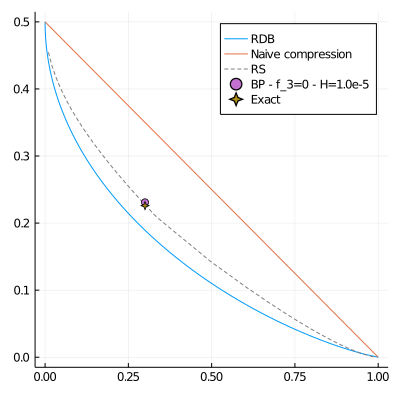

In [185]:
pl = plot_rdb()
scatter!([R], [dist], label="BP - f_3=0 - H=$H")
scatter!([R], [dist_oc], label="Exact", marker=:star4)
plot(pl, size=(400,400))

### 1.1 Varying H

In [155]:
n = 1000
R = 0.3
r = 1-3R
m = round(Int,n*(1-R))
Hs = 10.0 .^ (-2:0.5:0.5)
navg = 1
dist_f2 = [zeros(navg) for _ in eachindex(Hs)]
dist_oc_f2 = zeros(navg)
for j in 1:navg
    println("### Round $j of $navg ###")
    fg = ldpc_graphGF2(n,m)
    _, indep = lightbasis(fg)
    freevars = findall(indep)
    s = rand((-1,1), n)
    for (i,H) in enumerate(Hs)
        println("------ H=", H, ". ", i, " of ", length(Hs), " ------")
        fields = tanh.(H*copy(s))
        _,_,d = decimate!(fg, fields, freevars, maxiter=100, verbose=false, Tmax=1) 
        dist_f2[i][j] = d
    end
    lm = LossyModel(fg, y=(s.==-1))
    res = solve!(lm, OptimalCycle(), verbose=false)
    dist_oc_f2[j] = res.distortion
end

### Round 1 of 1 ###
------ H=0.01. 1 of 6 ------
# Trial 1 of 1: 0 unsat
------ H=0.03162277660168379. 2 of 6 ------
# Trial 1 of 1: 0 unsat
------ H=0.1. 3 of 6 ------
# Trial 1 of 1: 0 unsat
------ H=0.31622776601683794. 4 of 6 ------
# Trial 1 of 1: 0 unsat
------ H=1.0. 5 of 6 ------
# Trial 1 of 1: contradiction found already in the first BP run before decimation, after 68 iters
No zero-unsat found after 1 trials
------ H=3.1622776601683795. 6 of 6 ------
# Trial 1 of 1: contradiction found already in the first BP run before decimation, after 9 iters
No zero-unsat found after 1 trials


Average over 1 instances


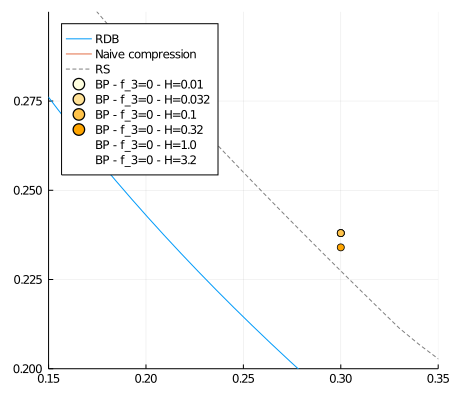

In [156]:
println("Average over $navg instances")
colors = cgrad(:heat, length(Hs)+1, categorical = true)
pl_f2 = plot_rdb()
for (i,H) in enumerate(Hs)
    scatter!(pl_f2, [R], [mean(dist_f2[i][.!isnan.(dist_f2[i])])], label="BP - f_3=0 - H=$(round(H,sigdigits=2))", 
        mc=colors[i])
end
# scatter!(pl_f2, [R], [mean(dist_oc_f2)], label="Exact - f_3=0", marker=:star4)
plot(pl_f2, size=(450,400), legend=:topleft)
xlims!((0.15,0.35)); ylims!((0.2,0.3))

In [157]:
[Hs dist_f2]

6×2 Array{Any,2}:
 0.01       [0.238]
 0.0316228  [0.238]
 0.1        [0.238]
 0.316228   [0.234]
 1.0        [NaN]
 3.16228    [NaN]

## 2. Mixture 2-3 variable degree

In [132]:
m = factorial(7)÷6*7÷8
R = 0.3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
# convert to edge degree convention to express the degree profile
lambda, rho = nodes2edges(Λ[1:end], K[1:end])
# build graph
fg = ldpc_graphGF2(n,m,nedges,lambda,rho)
H = 0.3
src = rand((-1,1), n)
fields = tanh.(H*copy(src))
fg.fields .= fields
_, freevars = findbasis_slow(Array(fg.H))

([0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 1 0; 0 0 … 0 1], [166, 513, 573, 576, 605, 614, 616, 620, 629, 636  …  1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050])

In [133]:
nunsat, ovl, dist2 = decimate!(fg, fields, freevars, maxiter=200, verbose=false, Tmax=1, tol=1e-18) 

# Trial 1 of 1: contradiction found after 40 iters
No zero-unsat found after 1 trials


(-1, NaN, NaN)

In [88]:
f = fg.fields
findall(f.==0)
# freevars[1]

2-element Array{Int64,1}:
 621
 763

In [89]:
i = 621
@show di = fg.Vneigs[i]
@show fg.Fneigs[di]
@show fg.mfv[di]

di = fg.Vneigs[i] = [174, 695]
fg.Fneigs[di] = [[763, 621, 869], [621, 763, 486]]
fg.mfv[di] = [[-0.2913126124515917, 0.2913126124515917, -0.08486303817337125], [0.0, 0.0, 0.0]]


2-element Array{Array{Float64,1},1}:
 [-0.2913126124515917, 0.2913126124515917, -0.08486303817337125]
 [0.0, 0.0, 0.0]

In [87]:
src[i]

1

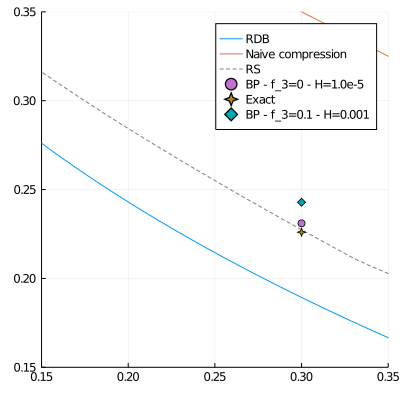

In [213]:
pl2 = deepcopy(pl)
scatter!(pl2, [R], [dist2], marker=:diamond, label="BP - f_3=$(round(r,digits=1)) - H=$H")
plot(pl2, size=(400,400))
xlims!((0.15,0.35)); ylims!((0.15,0.35))

### 2.1 Varying H

In [167]:
m = factorial(5)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
lambda, rho = nodes2edges(Λ[1:end], K[1:end])
Hs3 = [0.2,0.3, 0.4]
navg = 150
dist_f3 = [Float64[] for _ in eachindex(Hs3)]
for j in 1:navg
    println("#### Round $j of $navg")
    fg = ldpc_graphGF2(n,m,nedges,lambda,rho)
    _, freevars = findbasis_slow(Array(fg.H))
    s = rand((-1,1), n)
    for (i,H) in enumerate(Hs3)
        println("------ H=", H, ". ", i, " of ", length(Hs3), " ------")
        fields = tanh.(H*copy(s))
        _,_,d = decimate!(fg, fields, freevars, maxiter=1000, Tmax=20, verbose=false, tol=1e-12) 
        isnan(d) || push!(dist_f3[i], d) 
    end
end

#### Round 1 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 232 iters
# Trial 2 of 20: contradiction found after 263 iters
# Trial 3 of 20: contradiction found after 192 iters
# Trial 4 of 20: contradiction found after 187 iters
# Trial 5 of 20: contradiction found after 182 iters
# Trial 6 of 20: contradiction found after 208 iters
# Trial 7 of 20: contradiction found after 236 iters
# Trial 8 of 20: contradiction found after 255 iters
# Trial 9 of 20: contradiction found after 245 iters
# Trial 10 of 20: contradiction found after 187 iters
# Trial 11 of 20: contradiction found after 241 iters
# Trial 12 of 20: contradiction found after 194 iters
# Trial 13 of 20: contradiction found after 181 iters
# Trial 14 of 20: contradiction found after 193 iters
# Trial 15 of 20: contradiction found after 241 iters
# Trial 16 of 20: contradiction found after 190 iters
# Trial 17 of 20: contradiction found after 241 iters
# Trial 18 of 20: contradiction found after 244 iters
# Trial 1

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 19 iters
# Trial 2 of 20: contradiction found after 245 iters
# Trial 3 of 20: contradiction found after 753 iters
# Trial 4 of 20: contradiction found after 377 iters
# Trial 5 of 20: contradiction found after 125 iters
# Trial 6 of 20: contradiction found after 18 iters
# Trial 7 of 20: contradiction found after 357 iters
# Trial 8 of 20: contradiction found after 134 iters
# Trial 9 of 20: contradiction found after 40 iters
# Trial 10 of 20: contradiction found after 142 iters
# Trial 11 of 20: contradiction found after 830 iters
# Trial 12 of 20: contradiction found after 23 iters
# Trial 13 of 20: contradiction found after 175 iters
# Trial 14 of 20: contradiction found after 142 iters
# Trial 15 of 20: contradiction found after 11 iters
# Trial 16 of 20: contradiction found after 304 iters
# Trial 17 of 20

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 72 iters
# Trial 2 of 20: contradiction found after 93 iters
# Trial 3 of 20: 21 unsat
# Trial 4 of 20: 3 unsat
# Trial 5 of 20: 1 unsat
# Trial 6 of 20: 5 unsat
# Trial 7 of 20: 3 unsat
# Trial 8 of 20: contradiction found after 66 iters
# Trial 9 of 20: 4 unsat
# Trial 10 of 20: contradiction found after 79 iters
# Trial 11 of 20: 7 unsat
# Trial 12 of 20: contradiction found after 80 iters
# Trial 13 of 20: 3 unsat
# Trial 14 of 20: contradiction found after 62 iters
# Trial 15 of 20: contradiction found after 482 iters
# Trial 16 of 20: 16 unsat
# Trial 17 of 20: contradiction found after 93 iters
# Trial 18 of 20: 4 unsat
# Trial 19 of 20: contradiction found after 331 iters
# Trial 20 of 20: contradiction found after 111 iters
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 161 iters
# Trial 2 of 20: contradiction found after 421 iters
# Trial 3 of 20:

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 103 iters
# Trial 2 of 20: contradiction found after 75 iters
# Trial 3 of 20: contradiction found after 91 iters
# Trial 4 of 20: contradiction found after 99 iters
# Trial 5 of 20: contradiction found after 133 iters
# Trial 6 of 20: contradiction found after 264 iters
# Trial 7 of 20: contradiction found after 81 iters
# Trial 8 of 20: contradiction found after 72 iters
# Trial 9 of 20: contradiction found after 212 iters
# Trial 10 of 20: contradiction found after 72 iters
# Trial 11 of 20: contradiction found after 121 iters
# Trial 12 of 20: contradiction found after 91 iters
# Trial 13 of 20: contradiction found after 89 iters
# Trial 14 of 20: contradiction found after 431 iters
# Trial 15 of 20: contradiction found after 78 iters
# Trial 16 of 20: contradiction found after 73 iters
# Trial 17 of 20: contradiction found after 300 iters
# Trial 18 of 20: contradiction found after 108 iters
# Trial 19 of 20: c

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 120 iters
# Trial 2 of 20: contradiction found after 203 iters
# Trial 3 of 20: contradiction found after 395 iters
# Trial 4 of 20: contradiction found after 174 iters
# Trial 5 of 20: contradiction found after 112 iters
# Trial 6 of 20: contradiction found after 250 iters
# Trial 7 of 20: 3 unsat
# Trial 8 of 20: contradiction found after 96 iters
# Trial 9 of 20: contradiction found after 285 iters
# Trial 10 of 20: contradiction found after 358 iters
# Trial 11 of 20: contradiction found after 821 iters
# Trial 12 of 20: contradiction found after 583 iters
# Trial 13 of 20: contradiction found after 678 iters
# Trial 14 of 20: contradiction found after 43 iters
# Trial 15 of 20: contradiction found after 451 iters
# Trial 16 of 20: contradiction found after 105 iters
# Trial 17 of 20: contradiction found after 106 iters
# Trial 18 of 20: 2 unsat
# Trial 19 of 20: contradiction found after 695 iters
# Trial 20 of

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 41 iters
# Trial 2 of 20: 0 unsat
#### Round 7 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 8 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 35 iters
# Trial 2 of 20: contradiction found after 32 iters
# Trial 3 of 20: contradiction found after 35 iters
# Trial 4 of 20: contradiction found after 53 iters
# Trial 5 of 20: contradiction found after 59 iters
# Trial 6 of 20: 27 unsat
# Trial 7 of 20: contradiction found after 52 iters
# Trial 8 of 20: contradiction found after 62 iters
# Trial 9 of 20: contradiction found after 54 iters
# Trial 10 of 20: contradiction found after 121 iters
# Trial 11 of 20: contradiction found after 52 iters
# Trial 12 of 20: contradiction found after 51 iters
# Trial 13 of 20: contradiction found after 40 iters
# Trial 14 of 20: contradiction found after 52 iters
# Trial 15 of 20: contradiction found after 105 iters
# Trial 16 of 20: contradiction found after 280 iters
# Trial 17 of 20: contradiction found after 57 iters
# Trial 18 of 20: 19 unsat
# Trial 19 of 20: 30 unsat
# Trial 20 of 20: contradiction found after 55 it

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 43 iters
# Trial 2 of 20: contradiction found after 46 iters
# Trial 3 of 20: contradiction found after 44 iters
# Trial 4 of 20: contradiction found after 42 iters
# Trial 5 of 20: contradiction found after 40 iters
# Trial 6 of 20: contradiction found after 43 iters
# Trial 7 of 20: contradiction found after 60 iters
# Trial 8 of 20: contradiction found after 61 iters
# Trial 9 of 20: contradiction found after 42 iters
# Trial 10 of 20: contradiction found after 63 iters
# Trial 11 of 20: contradiction found after 45 iters
# Trial 12 of 20: contradiction found after 44 iters
# Trial 13 of 20: contradiction found after 43 iters
# Trial 14 of 20: contradiction found after 39 iters
# Trial 15 of 20: contradiction found after 44 iters
# Trial 16 of 20: contradiction found after 47 iters
# Trial 17 of 20: contradiction found after 49 iters
# Trial 18 of 20: contradiction found after 45 iters
# Trial 19 of 20: contradic

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 3 unsat
# Trial 2 of 20: 3 unsat
# Trial 3 of 20: 3 unsat
# Trial 4 of 20: 6 unsat
# Trial 5 of 20: 1 unsat
# Trial 6 of 20: 50 unsat
# Trial 7 of 20: 6 unsat
# Trial 8 of 20: 3 unsat
# Trial 9 of 20: 4 unsat
# Trial 10 of 20: 3 unsat
# Trial 11 of 20: 1 unsat
# Trial 12 of 20: 5 unsat
# Trial 13 of 20: 4 unsat
# Trial 14 of 20: 7 unsat
# Trial 15 of 20: 3 unsat
# Trial 16 of 20: 6 unsat
# Trial 17 of 20: 3 unsat
# Trial 18 of 20: 1 unsat
# Trial 19 of 20: 4 unsat
# Trial 20 of 20: 1 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 172 iters
# Trial 2 of 20: contradiction found after 134 iters
# Trial 3 of 20: contradiction found after 135 iters
# Trial 4 of 20: contradiction found after 174 iters
# Trial 5 of 20: contradiction found after 196 iters
# Trial 6 of 20: contradiction found after 172 iters
# Trial 7 of 20: contradiction found after 156 iters
# Trial 8 of 20: contradi

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat but 2 undecided
# Trial 2 of 20: 0 unsat
#### Round 12 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 100 iters
# Trial 2 of 20: contradiction found after 97 iters
# Trial 3 of 20: contradiction found after 107 iters
# Trial 4 of 20: contradiction found after 109 iters
# Trial 5 of 20: contradiction found after 109 iters
# Trial 6 of 20: contradiction found after 103 iters
# Trial 7 of 20: contradiction found after 107 iters
# Trial 8 of 20: contradiction found after 98 iters
# Trial 9 of 20: contradiction found after 103 iters
# Trial 10 of 20: contradiction found after 107 iters
# Trial 11 of 20: contradiction found after 96 iters
# Trial 12 of 20: contradiction found after 93 iters
# Trial 13 of 20: contradiction found after 91 iters
# Trial 14 of 20: contradiction found after 101 iters
# Trial 15 of 20: contradiction found after 106 iters
# Trial 16 of 20: contradiction found after 98 iters
# Trial 17 of 20: contradiction found after 107 iters
# Trial 18 of 20: contradiction found after 100 iters
# Trial 19 of 2

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 6 unsat
# Trial 2 of 20: 8 unsat
# Trial 3 of 20: 1 unsat
# Trial 4 of 20: 2 unsat
# Trial 5 of 20: contradiction found after 398 iters
# Trial 6 of 20: contradiction found after 392 iters
# Trial 7 of 20: 5 unsat
# Trial 8 of 20: contradiction found after 710 iters
# Trial 9 of 20: contradiction found after 428 iters
# Trial 10 of 20: 7 unsat
# Trial 11 of 20: 3 unsat
# Trial 12 of 20: 2 unsat
# Trial 13 of 20: 3 unsat
# Trial 14 of 20: 13 unsat
# Trial 15 of 20: 7 unsat
# Trial 16 of 20: contradiction found after 396 iters
# Trial 17 of 20: 7 unsat
# Trial 18 of 20: contradiction found after 255 iters
# Trial 19 of 20: 6 unsat
# Trial 20 of 20: 6 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 31 iters
# Trial 2 of 20: contradiction found after 286 iters
# Trial 3 of 20: contradiction found after 305 iters
# Trial 4 of 20: 3 unsat
# Trial 5 of 20: contradiction found after 27

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 64 iters
# Trial 2 of 20: contradiction found after 67 iters
# Trial 3 of 20: contradiction found after 689 iters
# Trial 4 of 20: contradiction found after 69 iters
# Trial 5 of 20: contradiction found after 38 iters
# Trial 6 of 20: contradiction found after 74 iters
# Trial 7 of 20: contradiction found after 37 iters
# Trial 8 of 20: contradiction found after 107 iters
# Trial 9 of 20: contradiction found after 74 iters
# Trial 10 of 20: contradiction found after 50 iters
# Trial 11 of 20: 1 unsat
# Trial 12 of 20: contradiction found after 476 iters
# Trial 13 of 20: contradiction found after 144 iters
# Trial 14 of 20: 1 unsat
# Trial 15 of 20: contradiction found after 76 iters
# Trial 16 of 20: contradiction found after 66 iters
# Trial 17 of 20: contradiction found after 71 iters
# Trial 18 of 20: contradiction found after 72 iters
# Trial 19 of 20: contradiction found after 55 iters
# Trial 20 of 20: contra

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 90 iters
# Trial 2 of 20: contradiction found after 102 iters
# Trial 3 of 20: 2 unsat
# Trial 4 of 20: contradiction found after 84 iters
# Trial 5 of 20: 3 unsat
# Trial 6 of 20: contradiction found after 102 iters
# Trial 7 of 20: contradiction found after 85 iters
# Trial 8 of 20: contradiction found after 91 iters
# Trial 9 of 20: contradiction found after 94 iters
# Trial 10 of 20: 4 unsat
# Trial 11 of 20: 3 unsat
# Trial 12 of 20: contradiction found after 86 iters
# Trial 13 of 20: 3 unsat
# Trial 14 of 20: contradiction found after 87 iters
# Trial 15 of 20: contradiction found after 80 iters
# Trial 16 of 20: contradiction found after 55 iters
# Trial 17 of 20: contradiction found after 66 iters
# Trial 18 of 20: contradiction found after 123 iters
# Trial 19 of 20: contradiction found after 110 iters
# Trial 20 of 20: 7 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 4 unsat
# Trial 2 of 20: 4 unsat
# Trial 3 of 20: 5 unsat
# Trial 4 of 20: 4 unsat
# Trial 5 of 20: 2 unsat
# Trial 6 of 20: 1 unsat
# Trial 7 of 20: 4 unsat
# Trial 8 of 20: 2 unsat
# Trial 9 of 20: 1 unsat
# Trial 10 of 20: 5 unsat
# Trial 11 of 20: 3 unsat
# Trial 12 of 20: 3 unsat
# Trial 13 of 20: 4 unsat
# Trial 14 of 20: 5 unsat
# Trial 15 of 20: 2 unsat
# Trial 16 of 20: 1 unsat
# Trial 17 of 20: 5 unsat
# Trial 18 of 20: 1 unsat
# Trial 19 of 20: 1 unsat
# Trial 20 of 20: 3 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 154 iters
# Trial 2 of 20: contradiction found after 835 iters
# Trial 3 of 20: contradiction found after 55 iters
# Trial 4 of 20: contradiction found after 258 iters
# Trial 5 of 20: 3 unsat
# Trial 6 of 20: contradiction found after 211 iters
# Trial 7 of 20: contradiction found after 206 iters
# Trial 8 of 20: contradiction found after 389 iters
# 

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 32 iters
# Trial 2 of 20: contradiction found after 36 iters
# Trial 3 of 20: contradiction found after 23 iters
# Trial 4 of 20: contradiction found after 45 iters
# Trial 5 of 20: contradiction found after 43 iters
# Trial 6 of 20: contradiction found after 34 iters
# Trial 7 of 20: contradiction found after 73 iters
# Trial 8 of 20: contradiction found after 47 iters
# Trial 9 of 20: contradiction found after 71 iters
# Trial 10 of 20: contradiction found after 32 iters
# Trial 11 of 20: contradiction found after 30 iters
# Trial 12 of 20: 25 unsat
# Trial 13 of 20: contradiction found after 32 iters
# Trial 14 of 20: contradiction found after 47 iters
# Trial 15 of 20: contradiction found after 47 iters
# Trial 16 of 20: contradiction found after 33 iters
# Trial 17 of 20: contradiction found after 54 iters
# Trial 18 of 20: contradiction found after 49 iters
# Trial 19 of 20: contradiction found after 31 iters


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 27 iters
# Trial 2 of 20: contradiction found after 21 iters
# Trial 3 of 20: contradiction found after 296 iters
# Trial 4 of 20: contradiction found after 45 iters
# Trial 5 of 20: contradiction found after 28 iters
# Trial 6 of 20: contradiction found after 201 iters
# Trial 7 of 20: contradiction found after 19 iters
# Trial 8 of 20: contradiction found after 27 iters
# Trial 9 of 20: 0 unsat
#### Round 19 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 20 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 21 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 196 iters
# Trial 2 of 20: contradiction found after 120 iters
# Trial 3 of 20: contradiction found after 23 iters
# Trial 4 of 20: contradiction found after 108 iters
# Trial 5 of 20: contradiction found after 31 iters
# Trial 6 of 20: contradiction found after 112 iters
# Trial 7 of 20: contradiction found after 72 iters
# Trial 8 of 20: contradiction found after 142 iters
# Trial 9 of 20: contradiction found after 86 iters
# Trial 10 of 20: contradiction found after 106 iters
# Trial 11 of 20: contradiction found after 482 iters
# Trial 12 of 20: contradiction found after 40 iters
# Trial 13 of 20: contradiction found after 62 iters
# Trial 14 of 20: contradiction found after 32 iters
# Trial 15 of 20: contradiction found after 35 iters
# Trial 16 of 20: contradiction found after 100 iters
# Trial 17 of 20: contradiction found after 105 iters
# Trial 18 of 20: 

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 23 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 104 iters
# Trial 2 of 20: contradiction found after 166 iters
# Trial 3 of 20: contradiction found after 107 iters
# Trial 4 of 20: contradiction found after 246 iters
# Trial 5 of 20: contradiction found after 228 iters
# Trial 6 of 20: contradiction found after 209 iters
# Trial 7 of 20: contradiction found after 319 iters
# Trial 8 of 20: contradiction found after 106 iters
# Trial 9 of 20: contradiction found after 96 iters
# Trial 10 of 20: contradiction found after 113 iters
# Trial 11 of 20: contradiction found after 257 iters
# Trial 12 of 20: contradiction found after 80 iters
# Trial 13 of 20: contradiction found after 171 iters
# Trial 14 of 20: contradiction found after 507 iters
# Trial 15 of 20: contradiction found after 105 iters
# Trial 16 of 20: contradiction found after 535 iters
# Trial 17 of 20: contradiction found after 98 iters
# Trial 18 of 20: contradiction found after 392 iters
# Trial 19 o

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 224 iters
# Trial 2 of 20: contradiction found after 222 iters
# Trial 3 of 20: contradiction found after 144 iters
# Trial 4 of 20: contradiction found after 185 iters
# Trial 5 of 20: contradiction found after 297 iters
# Trial 6 of 20: contradiction found after 16 iters
# Trial 7 of 20: contradiction found after 19 iters
# Trial 8 of 20: contradiction found after 87 iters
# Trial 9 of 20: contradiction found after 18 iters
# Trial 10 of 20: contradiction found after 19 iters
# Trial 11 of 20: contradiction found after 181 iters
# Trial 12 of 20: contradiction found after 495 iters
# Trial 13 of 20: contradiction found after 632 iters
# Trial 14 of 20: contradiction found after 160 iters
# Trial 15 of 20: contradiction found after 210 iters
# Trial 16 of 20: contradiction found after 147 iters
# Trial 17 of 20: contradiction found after 170 iters
# Trial 18 of 2

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 292 iters
# Trial 2 of 20: 7 unsat
# Trial 3 of 20: contradiction found after 687 iters
# Trial 4 of 20: contradiction found after 840 iters
# Trial 5 of 20: 5 unsat
# Trial 6 of 20: 2 unsat
# Trial 7 of 20: contradiction found after 263 iters
# Trial 8 of 20: 2 unsat
# Trial 9 of 20: contradiction found after 332 iters
# Trial 10 of 20: 2 unsat
# Trial 11 of 20: 7 unsat
# Trial 12 of 20: 9 unsat
# Trial 13 of 20: 2 unsat
# Trial 14 of 20: contradiction found after 275 iters
# Trial 15 of 20: 3 unsat
# Trial 16 of 20: 5 unsat
# Trial 17 of 20: 6 unsat
# Trial 18 of 20: 3 unsat
# Trial 19 of 20: contradiction found after 373 iters
# Trial 20 of 20: 6 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 38 iters
# Trial 2 of 20: contradiction found after 22 iters
# Trial 3 of 20: contradiction found after 2

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 89 iters
# Trial 2 of 20: contradiction found after 91 iters
# Trial 3 of 20: contradiction found after 87 iters
# Trial 4 of 20: contradiction found after 93 iters
# Trial 5 of 20: contradiction found after 86 iters
# Trial 6 of 20: contradiction found after 92 iters
# Trial 7 of 20: contradiction found after 96 iters
# Trial 8 of 20: contradiction found after 94 iters
# Trial 9 of 20: contradiction found after 87 iters
# Trial 10 of 20: contradiction found after 92 iters
# Trial 11 of 20: contradiction found after 95 iters
# Trial 12 of 20: contradiction found after 89 iters
# Trial 13 of 20: contradiction found after 87 iters
# Trial 14 of 20: contradiction found after 91 iters
# Trial 15 of 20: contradiction found after 91 iters
# Trial 16 of 20: contradiction found after 97 iters
# Trial 17 of 20: contradiction found after 90 iters
# Trial 18 of 20: contradic

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 28 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 29 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 1 unsat
# Trial 2 of 20: 1 unsat
# Trial 3 of 20: 1 unsat
# Trial 4 of 20: 1 unsat
# Trial 5 of 20: 1 unsat
# Trial 6 of 20: 1 unsat
# Trial 7 of 20: 1 unsat
# Trial 8 of 20: 1 unsat
# Trial 9 of 20: 1 unsat
# Trial 10 of 20: 1 unsat
# Trial 11 of 20: 1 unsat
# Trial 12 of 20: 1 unsat
# Trial 13 of 20: 1 unsat
# Trial 14 of 20: 1 unsat
# Trial 15 of 20: 1 unsat
# Trial 16 of 20: 1 unsat
# Trial 17 of 20: 1 unsat
# Trial 18 of 20: 1 unsat
# Trial 19 of 20: 1 unsat
# Trial 20 of 20: 1 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 20 iters
# Trial 2 of 20: 3 unsat
# Trial 3 of 20: contradiction found after 23 iters
# Trial 4 of 20: contradiction found after 25 iters
# Trial 5 of 20: contradiction found after 31 iters
# Trial 6 of 20: contradiction found after 120 iters
# Trial 7 of 20: 0 unsat but 4 undecided
# Trial 8 of 20: 

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 222 iters
# Trial 2 of 20: contradiction found after 196 iters
# Trial 3 of 20: contradiction found after 192 iters
# Trial 4 of 20: contradiction found after 197 iters
# Trial 5 of 20: contradiction found after 229 iters
# Trial 6 of 20: contradiction found after 210 iters
# Trial 7 of 20: contradiction found after 194 iters
# Trial 8 of 20: contradiction found after 191 iters
# Trial 9 of 20: contradiction found after 103 iters
# Trial 10 of 20: contradiction found after 191 iters
# Trial 11 of 20: contradiction found after 201 iters
# Trial 12 of 20: contradiction found after 55 iters
# Trial 13 of 20: contradiction found after 199 iters
# Trial 14 of 20: contradiction found after 126 iters
# Trial 15 of 20: contradiction found after 186 iters
# Trial 16 of 20: contradiction found after 72 iters
# Trial 17 of 20: contradiction found after 99 iters
# Trial 18 of 20: contradiction found after 98 iters
# Trial 19 of

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 32 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 264 iters
# Trial 2 of 20: contradiction found after 292 iters
# Trial 3 of 20: contradiction found after 203 iters
# Trial 4 of 20: contradiction found after 940 iters
# Trial 5 of 20: contradiction found after 321 iters
# Trial 6 of 20: contradiction found after 74 iters
# Trial 7 of 20: contradiction found after 389 iters
# Trial 8 of 20: contradiction found after 379 iters
# Trial 9 of 20: contradiction found after 371 iters
# Trial 10 of 20: 6 unsat
# Trial 11 of 20: contradiction found after 446 iters
# Trial 12 of 20: contradiction found after 327 iters
# Trial 13 of 20: contradiction found after 262 iters
# Trial 14 of 20: contradiction found after 396 iters
# Trial 15 of 20: contradiction found after 345 iters
# Trial 16 of 20: contradiction found after 50 iters
# Trial 17 of 20: contradiction found after 307 iters
# Trial 18 of 20: contradiction found after 292 iters
# Trial 19 of 20: contradiction found a

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 34 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 111 iters
# Trial 2 of 20: contradiction found after 106 iters
# Trial 3 of 20: contradiction found after 114 iters
# Trial 4 of 20: contradiction found after 109 iters
# Trial 5 of 20: contradiction found after 114 iters
# Trial 6 of 20: contradiction found after 112 iters
# Trial 7 of 20: contradiction found after 109 iters
# Trial 8 of 20: contradiction found after 109 iters
# Trial 9 of 20: contradiction found after 112 iters
# Trial 10 of 20: contradiction found after 116 iters
# Trial 11 of 20: contradiction found after 109 iters
# Trial 12 of 20: contradiction found after 112 iters
# Trial 13 of 20: contradiction found after 103 iters
# Trial 14 of 20: contradiction found after 104 iters
# Trial 15 of 20: contradiction found after 112 iters
# Trial 16 of 20: contradiction found after 113 iters
# Trial 17 of 20: contradiction found after 105 iters
# Trial 18 of 20: contradiction found after 111 iters
# Trial 1

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 36 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 575 iters
# Trial 2 of 20: 5 unsat
# Trial 3 of 20: contradiction found after 178 iters
# Trial 4 of 20: contradiction found after 522 iters
# Trial 5 of 20: 94 unsat
# Trial 6 of 20: contradiction found after 564 iters
# Trial 7 of 20: 3 unsat
# Trial 8 of 20: contradiction found after 694 iters
# Trial 9 of 20: contradiction found after 390 iters
# Trial 10 of 20: contradiction found after 177 iters
# Trial 11 of 20: contradiction found after 950 iters
# Trial 12 of 20: 15 unsat
# Trial 13 of 20: contradiction found after 391 iters
# Trial 14 of 20: contradiction found after 417 iters
# Trial 15 of 20: contradiction found after 582 iters
# Trial 16 of 20: contradiction found after 682 iters
# Trial 17 of 20: 5 unsat
# Trial 18 of 20: contradiction found after 392 iters
# Trial 19 of 20: contradiction found after 732 iters
# Trial 20 of 20: contradiction found after 829 iters
No zero-unsat found after 20 trials
---

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 77 iters
# Trial 2 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 38 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 245 iters
# Trial 2 of 20: contradiction found after 61 iters
# Trial 3 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 135 iters
# Trial 2 of 20: contradiction found after 579 iters
# Trial 3 of 20: contradiction found after 115 iters
# Trial 4 of 20: contradiction found after 245 iters
# Trial 5 of 20: contradiction found after 212 iters
# Trial 6 of 20: contradiction found after 194 iters
# Trial 7 of 20: contradiction found after 598 iters
# Trial 8 of 20: contradiction found after 500 iters
# Trial 9 of 20: contradiction found after 311 iters
# Trial 10 of 20: contradiction found after 932 iters
# Trial 11 of 20: contradiction found after 104 iters
# Trial 12 of 20: contradiction found after 40 iters
# Trial 13 of 20: contradiction found after 11 iters
# Trial 14 of 20: contradiction found after 121 iters
# Trial 15 of 20

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 99 iters
# Trial 2 of 20: contradiction found after 146 iters
# Trial 3 of 20: 0 unsat
#### Round 40 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 41 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 59 iters
# Trial 2 of 20: contradiction found after 66 iters
# Trial 3 of 20: contradiction found after 37 iters
# Trial 4 of 20: contradiction found after 95 iters
# Trial 5 of 20: contradiction found after 44 iters
# Trial 6 of 20: contradiction found after 44 iters
# Trial 7 of 20: contradiction found after 41 iters
# Trial 8 of 20: contradiction found after 60 iters
# Trial 9 of 20: contradiction found after 37 iters
# Trial 10 of 20: contradiction found after 65 iters
# Trial 11 of 20: contradiction found after 49 iters
# Trial 12 of 20: contradiction found after 54 iters
# Trial 13 of 20: contradiction found after 50 iters
# Trial 14 of 20: contradiction found after 68 iters
# Trial 15 of 20: contradiction found after 72 iters
# Trial 16 of 20: contradiction found after 184 iters
# Trial 17 of 20: contradiction found after 64 iters
# Trial 18 of 20: contradiction found after 55 iters
# Trial 19 of 20: contradi

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 47 iters
# Trial 2 of 20: contradiction found after 47 iters
# Trial 3 of 20: contradiction found after 46 iters
# Trial 4 of 20: contradiction found after 90 iters
# Trial 5 of 20: contradiction found after 38 iters
# Trial 6 of 20: contradiction found after 47 iters
# Trial 7 of 20: contradiction found after 94 iters
# Trial 8 of 20: contradiction found after 37 iters
# Trial 9 of 20: contradiction found after 42 iters
# Trial 10 of 20: contradiction found after 45 iters
# Trial 11 of 20: contradiction found after 44 iters
# Trial 12 of 20: contradiction found after 44 iters
# Trial 13 of 20: contradiction found after 42 iters
# Trial 14 of 20: contradiction found after 47 iters
# Trial 15 of 20: contradiction found after 82 iters
# Trial 16 of 20: contradiction found after 146 iters
# Trial 17 of 20: contradi

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 958 iters
# Trial 2 of 20: contradiction found after 294 iters
# Trial 3 of 20: 0 unsat
#### Round 44 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 440 iters
# Trial 2 of 20: contradiction found after 201 iters
# Trial 3 of 20: 2 unsat
# Trial 4 of 20: 8 unsat
# Trial 5 of 20: contradiction found after 607 iters
# Trial 6 of 20: 5 unsat
# Trial 7 of 20: 12 unsat
# Trial 8 of 20: contradiction found after 413 iters
# Trial 9 of 20: 5 unsat
# Trial 10 of 20: 5 unsat
# Trial 11 of 20: 5 unsat
# Trial 12 of 20: contradiction found after 360 iters
# Trial 13 of 20: 14 unsat
# Trial 14 of 20: 11 unsat
# Trial 15 of 20: 8 unsat
# Trial 16 of 20: 3 unsat
# Trial 17 of 20: contradiction found after 130 iters
# Trial 18 of 20: contradiction found after 161 iters
# Trial 19 of 20: contradiction found after 81 iters
# Trial 20 of 20: contradiction found after 72 iters
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 293 iters
# Trial 2 of 20: contradiction found after 60 iters
# Trial 3 of 20: contradiction found af

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 33 iters
# Trial 2 of 20: contradiction found after 31 iters
# Trial 3 of 20: contradiction found after 923 iters
# Trial 4 of 20: contradiction found after 40 iters
# Trial 5 of 20: contradiction found after 30 iters
# Trial 6 of 20: contradiction found after 38 iters
# Trial 7 of 20: contradiction found after 55 iters
# Trial 8 of 20: contradiction found after 67 iters
# Trial 9 of 20: contradiction found after 36 iters
# Trial 10 of 20: contradiction found after 38 iters
# Trial 11 of 20: contradiction found after 66 iters
# Trial 12 of 20: 1 unsat
# Trial 13 of 20: contradiction found after 40 iters
# Trial 14 of 20: contradiction found after 72 iters
# Trial 15 of 20: contradiction found after 41 iters
# Trial 16 of 20: contradiction found after 37 iters
# Trial 17 of 20: contradiction found after 34 iters
# Trial 18 of 20: contradiction found after 39 iters


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 644 iters
# Trial 2 of 20: 0 unsat
#### Round 47 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 41 iters
# Trial 2 of 20: contradiction found after 21 iters
# Trial 3 of 20: contradiction found after 39 iters
# Trial 4 of 20: contradiction found after 16 iters
# Trial 5 of 20: contradiction found after 58 iters
# Trial 6 of 20: contradiction found after 41 iters
# Trial 7 of 20: contradiction found after 41 iters
# Trial 8 of 20: contradiction found after 48 iters
# Trial 9 of 20: contradiction found after 43 iters
# Trial 10 of 20: contradiction found after 27 iters
# Trial 11 of 20: contradiction found after 43 iters
# Trial 12 of 20: contradiction found after 17 iters
# Trial 13 of 20: contradiction found after 40 iters
# Trial 14 of 20: contradiction found after 24 iters
# Trial 15 of 20: contradiction found after 21 iters
# Trial 16 of 20: contradiction found after 38 iters
# Trial 17 of 20: contradiction found after 21 iters
# Trial 18 of 20: contradiction found after 45 iters
# Trial 19 of 20: contradic

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 275 iters
# Trial 2 of 20: contradiction found after 166 iters
# Trial 3 of 20: 11 unsat
# Trial 4 of 20: 5 unsat
# Trial 5 of 20: 4 unsat
# Trial 6 of 20: 9 unsat
# Trial 7 of 20: 7 unsat
# Trial 8 of 20: 3 unsat
# Trial 9 of 20: 1 unsat
# Trial 10 of 20: 10 unsat
# Trial 11 of 20: 9 unsat
# Trial 12 of 20: 6 unsat
# Trial 13 of 20: contradiction found after 117 iters
# Trial 14 of 20: 1 unsat
# Trial 15 of 20: 1 unsat
# Trial 16 of 20: 4 unsat
# Trial 17 of 20: 4 unsat
# Trial 18 of 20: 6 unsat
# Trial 19 of 20: 6 unsat
# Trial 20 of 20: 3 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 229 iters
# Trial 2 of 20: contradiction found after 355 iters
# Trial 3 of 20: contradiction found after 365 iters
# Trial 4 of 20: contradiction found after 274 iters
# Trial 5 of 20: contradiction found after 229 iters
# Trial 6 of 20: contradiction found after 380

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 50 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 572 iters
# Trial 2 of 20: 1 unsat
# Trial 3 of 20: contradiction found after 721 iters
# Trial 4 of 20: contradiction found after 992 iters
# Trial 5 of 20: contradiction found after 869 iters
# Trial 6 of 20: contradiction found after 307 iters
# Trial 7 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 22 iters
# Trial 2 of 20: contradiction found after 19 iters
# Trial 3 of 20: contradiction found after 17 iters
# Trial 4 of 20: contradiction found after 23 iters
# Trial 5 of 20: contradiction found after 30 iters
# Trial 6 of 20: contradiction found after 24 iters
# Trial 7 of 20: contradiction found after 20 iters
# Trial 8 of 20: contradiction found after 20 iters
# Trial 9 of 20: contradiction found after 19 iters
# Trial 10 of 20: contradiction found after 22 iters
# Trial 11 of 20: contradiction found after 35 iters
# Trial 12 of 20: contradiction found after 54 iters
# 

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 11 iters
# Trial 2 of 20: 3 unsat
# Trial 3 of 20: contradiction found after 15 iters
# Trial 4 of 20: 2 unsat
# Trial 5 of 20: contradiction found after 15 iters
# Trial 6 of 20: 1 unsat
# Trial 7 of 20: 1 unsat
# Trial 8 of 20: contradiction found after 13 iters
# Trial 9 of 20: 2 unsat
# Trial 10 of 20: contradiction found after 18 iters
# Trial 11 of 20: contradiction found after 13 iters
# Trial 12 of 20: contradiction found after 14 iters
# Trial 13 of 20: 4 unsat
# Trial 14 of 20: contradiction found after 15 iters
# Trial 15 of 20: contradiction found after 41 iters
# Trial 16 of 20: 4 unsat
# Trial 17 of 20: 3 unsat
# Trial 18 of 20: contradiction found after 16 iters
# Trial 19 of 20: contradiction found after 11 iters
# Trial 20 of 20: 3 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 19 iters
# Trial 2 of 20: contradiction found after 19 it

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 64 iters
# Trial 2 of 20: contradiction found after 67 iters
# Trial 3 of 20: contradiction found after 63 iters
# Trial 4 of 20: contradiction found after 62 iters
# Trial 5 of 20: contradiction found after 62 iters
# Trial 6 of 20: contradiction found after 62 iters
# Trial 7 of 20: contradiction found after 64 iters
# Trial 8 of 20: contradiction found after 66 iters
# Trial 9 of 20: contradiction found after 73 iters
# Trial 10 of 20: contradiction found after 60 iters
# Trial 11 of 20: contradiction found after 60 iters
# Trial 12 of 20: contradiction found after 61 iters
# Trial 13 of 20: contradiction found after 64 iters
# Trial 14 of 20: contradiction found after 60 iters
# Trial 15 of 20: contradiction found after 62 iters
# Trial 16 of 20: contradiction found after 64 iters
# Trial 17 of 20: contradiction found after 62 iters
# Trial 18 of 20: contradiction found after 67 iters
# Trial 19 of 20: contradic

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 2 unsat
# Trial 2 of 20: 4 unsat
# Trial 3 of 20: contradiction found after 351 iters
# Trial 4 of 20: contradiction found after 206 iters
# Trial 5 of 20: contradiction found after 404 iters
# Trial 6 of 20: contradiction found after 58 iters
# Trial 7 of 20: contradiction found after 663 iters
# Trial 8 of 20: contradiction found after 408 iters
# Trial 9 of 20: contradiction found after 431 iters
# Trial 10 of 20: contradiction found after 435 iters
# Trial 11 of 20: contradiction found after 99 iters
# Trial 12 of 20: contradiction found after 124 iters
# Trial 13 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 77 iters
# Trial 2 of 20: contradiction found after 59 iters
# Trial 3 of 20: contradiction found after 137 iters
# Trial 4 of 20: contradiction found after 99 iters
# Trial 5 of 20: contradiction found after 56 iters
# Trial 6 of 20: contra

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 5 unsat
# Trial 2 of 20: 1 unsat
# Trial 3 of 20: 5 unsat
# Trial 4 of 20: 4 unsat
# Trial 5 of 20: 8 unsat
# Trial 6 of 20: 3 unsat
# Trial 7 of 20: 5 unsat
# Trial 8 of 20: 3 unsat
# Trial 9 of 20: 8 unsat
# Trial 10 of 20: 1 unsat
# Trial 11 of 20: 1 unsat
# Trial 12 of 20: 7 unsat
# Trial 13 of 20: 4 unsat
# Trial 14 of 20: 4 unsat
# Trial 15 of 20: 1 unsat
# Trial 16 of 20: 1 unsat
# Trial 17 of 20: 7 unsat
# Trial 18 of 20: 3 unsat
# Trial 19 of 20: 1 unsat
# Trial 20 of 20: 5 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 15 iters
# Trial 2 of 20: contradiction found after 12 iters
# Trial 3 of 20: contradiction found after 10 iters
# Trial 4 of 20: contradiction found after 18 iters
# Trial 5 of 20: contradiction found after 25 iters
# Trial 6 of 20: 0 unsat
#### Round 55 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 56 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 57 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat but 2 undecided
# Trial 2 of 20: 0 unsat but 2 undecided
# Trial 3 of 20: 0 unsat but 2 undecided
# Trial 4 of 20: 0 unsat but 2 undecided
# Trial 5 of 20: 0 unsat but 2 undecided
# Trial 6 of 20: 0 unsat but 2 undecided
# Trial 7 of 20: 0 unsat but 2 undecided
# Trial 8 of 20: 0 unsat but 2 undecided
# Trial 9 of 20: 0 unsat but 2 undecided
# Trial 10 of 20: 0 unsat but 2 undecided
# Trial 11 of 20: 0 unsat but 2 undecided
# Trial 12 of 20: 0 unsat but 2 undecided
# Trial 13 of 20: 0 unsat but 2 undecided
# Trial 14 of 20: 0 unsat but 2 undecided
# Trial 15 of 20: 0 unsat but 2 undecided
# Trial 16 of 20: 0 unsat but 2 undecided
# Trial 17 of 20: 0 unsat but 2 undecided
# Trial 18 of 20: 0 unsat but 2 undecided
# Trial 19 of 20: 0 unsat but 2 undecided
# Trial 20 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 58 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 624 iters
# Trial 2 of 20: contradiction found after 519 iters
# Trial 3 of 20: contradiction found after 889 iters
# Trial 4 of 20: contradiction found after 344 iters
# Trial 5 of 20: contradiction found after 99 iters
# Trial 6 of 20: contradiction found after 299 iters
# Trial 7 of 20: contradiction found after 913 iters
# Trial 8 of 20: contradiction found after 87 iters
# Trial 9 of 20: contradiction found after 371 iters
# Trial 10 of 20: contradiction found after 891 iters
# Trial 11 of 20: contradiction found after 762 iters
# Trial 12 of 20: contradiction found after 362 iters
# Trial 13 of 20: contradiction found after 617 iters
# Trial 14 of 20: contradiction found after 982 iters
# Trial 15 of 20: contradiction found after 183 iters
# Trial 16 of 20: contradiction found after 675 iters
# Trial 17 of

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 4 unsat
# Trial 2 of 20: 9 unsat
# Trial 3 of 20: 6 unsat
# Trial 4 of 20: 5 unsat
# Trial 5 of 20: 2 unsat
# Trial 6 of 20: 5 unsat
# Trial 7 of 20: 3 unsat
# Trial 8 of 20: 6 unsat
# Trial 9 of 20: 3 unsat
# Trial 10 of 20: 3 unsat
# Trial 11 of 20: 3 unsat
# Trial 12 of 20: 7 unsat
# Trial 13 of 20: 6 unsat
# Trial 14 of 20: 5 unsat
# Trial 15 of 20: 3 unsat
# Trial 16 of 20: 3 unsat
# Trial 17 of 20: 5 unsat
# Trial 18 of 20: 4 unsat
# Trial 19 of 20: 1 unsat
# Trial 20 of 20: 5 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 81 iters
# Trial 2 of 20: contradiction found after 60 iters
# Trial 3 of 20: contradiction found after 134 iters
# Trial 4 of 20: contradiction found after 58 iters
# Trial 5 of 20: 0 unsat
#### Round 60 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 61 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 5 unsat
# Trial 2 of 20: 6 unsat
# Trial 3 of 20: 5 unsat
# Trial 4 of 20: 4 unsat
# Trial 5 of 20: 9 unsat
# Trial 6 of 20: 8 unsat
# Trial 7 of 20: 9 unsat
# Trial 8 of 20: 5 unsat
# Trial 9 of 20: 3 unsat
# Trial 10 of 20: 7 unsat
# Trial 11 of 20: 4 unsat
# Trial 12 of 20: 7 unsat
# Trial 13 of 20: 3 unsat
# Trial 14 of 20: 5 unsat
# Trial 15 of 20: 8 unsat
# Trial 16 of 20: contradiction found after 163 iters
# Trial 17 of 20: 5 unsat
# Trial 18 of 20: 7 unsat
# Trial 19 of 20: 8 unsat
# Trial 20 of 20: 3 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 120 iters
# Trial 2 of 20: contradiction found after 105 iters
# Trial 3 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 58 iters
# Trial 2 of 20: 5 unsat
# Trial 3 of 20: contradiction found after 632 iters
# Trial 4 of 20: contradiction found after 17 iters
# Trial 5 of 20: contradicti

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 10 unsat
# Trial 2 of 20: contradiction found after 310 iters
# Trial 3 of 20: contradiction found after 322 iters
# Trial 4 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 44 iters
# Trial 2 of 20: contradiction found after 258 iters
# Trial 3 of 20: contradiction found after 71 iters
# Trial 4 of 20: contradiction found after 126 iters
# Trial 5 of 20: contradiction found after 211 iters
# Trial 6 of 20: contradiction found after 108 iters
# Trial 7 of 20: contradiction found after 120 iters
# Trial 8 of 20: contradiction found after 128 iters
# Trial 9 of 20: contradiction found after 37 iters
# Trial 10 of 20: contradiction found after 54 iters
# Trial 11 of 20: contradiction found after 104 iters
# Trial 12 of 20: contradiction found after 61 iters
# Trial 13 of 20: contradiction found after 121 iters
# Trial 14 of 20: contradiction found after 137 iters
# Trial 15 of 20: contradiction found after 4

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 69 iters
# Trial 2 of 20: contradiction found after 92 iters
# Trial 3 of 20: contradiction found after 89 iters
# Trial 4 of 20: contradiction found after 74 iters
# Trial 5 of 20: contradiction found after 87 iters
# Trial 6 of 20: contradiction found after 89 iters
# Trial 7 of 20: contradiction found after 56 iters
# Trial 8 of 20: contradiction found after 87 iters
# Trial 9 of 20: contradiction found after 276 iters
# Trial 10 of 20: contradiction found after 76 iters
# Trial 11 of 20: contradiction found after 86 iters
# Trial 12 of 20: contradiction found after 57 iters
# Trial 13 of 20: contradiction found after 93 iters
# Trial 14 of 20: contradiction found after 85 iters
# Trial 15 of 20: contradiction found after 64 iters
# Trial 16 of 20: contradiction found after 74 iters
# Trial 17 of 20: contradiction found after 91 iters
# Trial 18 of 20: contradi

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 85 iters
# Trial 2 of 20: contradiction found after 917 iters
# Trial 3 of 20: 0 unsat
#### Round 65 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 43 iters
# Trial 2 of 20: contradiction found after 31 iters
# Trial 3 of 20: contradiction found after 28 iters
# Trial 4 of 20: contradiction found after 25 iters
# Trial 5 of 20: contradiction found after 32 iters
# Trial 6 of 20: contradiction found after 25 iters
# Trial 7 of 20: contradiction found after 42 iters
# Trial 8 of 20: contradiction found after 28 iters
# Trial 9 of 20: contradiction found after 30 iters
# Trial 10 of 20: contradiction found after 32 iters
# Trial 11 of 20: contradiction found after 32 iters
# Trial 12 of 20: contradiction found after 28 iters
# Trial 13 of 20: contradiction found after 27 iters
# Trial 14 of 20: contradiction found after 25 iters
# Trial 15 of 20: contradiction found after 30 iters
# Trial 16 of 20: contradiction found after 32 iters
# Trial 17 of 20: contradiction found after 30 iters
# Trial 18 of 20: contradiction found after 34 iters
# Trial 19 of 20: contradic

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 89 iters
# Trial 2 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 301 iters
# Trial 2 of 20: contradiction found after 295 iters
# Trial 3 of 20: contradiction found after 307 iters
# Trial 4 of 20: contradiction found after 291 iters
# Trial 5 of 20: contradiction found after 298 iters
# Trial 6 of 20: contradiction found after 288 iters
# Trial 7 of 20: contradiction found after 297 iters
# Trial 8 of 20: contradiction found after 301 iters
# Trial 9 of 20: contradiction found after 315 iters
# Trial 10 of 20: contradiction found after 308 iters
# Trial 11 of 20: contradiction found after 301 iters
# Trial 12 of 20: contradiction found after 297 iters
# Trial 13 of 20: contradiction found after 291 iters
# Trial 14 of 20: contradiction found after 284 iters
# Trial 15 of 20: contradiction found after 314 iters
# Trial 16 of

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 261 iters
# Trial 2 of 20: contradiction found after 499 iters
# Trial 3 of 20: contradiction found after 233 iters
# Trial 4 of 20: contradiction found after 821 iters
# Trial 5 of 20: contradiction found after 305 iters
# Trial 6 of 20: contradiction found after 204 iters
# Trial 7 of 20: contradiction found after 257 iters
# Trial 8 of 20: contradiction found after 214 iters
# Trial 9 of 20: contradiction found after 226 iters
# Trial 10 of 20: contradiction found after 511 iters
# Trial 11 of 20: contradiction found after 190 iters
# Trial 12 of 20: contradiction found after 204 iters
# Trial 13 of 20: contradiction found after 442 iters
# Trial 14 of 20: contradiction found after 366 iters
# Trial 15 of 20: contradiction found after 510 iters
# Trial 16 of 20: contradiction found after 50 iters
# Trial 17 of 20: contradiction found after 205 iters
# Trial 18 of 20: contradiction found after 674 iters
# Trial 19

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 69 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 119 iters
# Trial 2 of 20: contradiction found after 112 iters
# Trial 3 of 20: contradiction found after 172 iters
# Trial 4 of 20: contradiction found after 113 iters
# Trial 5 of 20: contradiction found after 107 iters
# Trial 6 of 20: contradiction found after 121 iters
# Trial 7 of 20: contradiction found after 109 iters
# Trial 8 of 20: contradiction found after 110 iters
# Trial 9 of 20: 7 unsat
# Trial 10 of 20: contradiction found after 105 iters
# Trial 11 of 20: contradiction found after 119 iters
# Trial 12 of 20: 46 unsat
# Trial 13 of 20: 22 unsat
# Trial 14 of 20: contradiction found after 141 iters
# Trial 15 of 20: contradiction found after 111 iters
# Trial 16 of 20: contradiction found after 100 iters
# Trial 17 of 20: contradiction found after 119 iters
# Trial 18 of 20: contradiction found after 232 iters
# Trial 19 of 20: contradiction found after 110 iters
# Trial 20 of 20: contradiction found

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 3 unsat
# Trial 2 of 20: 8 unsat
# Trial 3 of 20: 2 unsat
# Trial 4 of 20: 5 unsat
# Trial 5 of 20: 5 unsat
# Trial 6 of 20: 4 unsat
# Trial 7 of 20: 6 unsat
# Trial 8 of 20: contradiction found after 335 iters
# Trial 9 of 20: 3 unsat
# Trial 10 of 20: 3 unsat
# Trial 11 of 20: 1 unsat
# Trial 12 of 20: contradiction found after 127 iters
# Trial 13 of 20: 1 unsat
# Trial 14 of 20: 1 unsat
# Trial 15 of 20: 7 unsat
# Trial 16 of 20: 6 unsat
# Trial 17 of 20: 5 unsat
# Trial 18 of 20: 6 unsat
# Trial 19 of 20: 1 unsat
# Trial 20 of 20: contradiction found after 209 iters
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 94 iters
# Trial 2 of 20: contradiction found after 492 iters
# Trial 3 of 20: contradiction found after 420 iters
# Trial 4 of 20: contradiction found after 145 iters
# Trial 5 of 20: contradiction found after 259 iters
# Trial 6 of 20: contradiction found after 236 it

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 200 iters
# Trial 2 of 20: contradiction found after 89 iters
# Trial 3 of 20: contradiction found after 241 iters
# Trial 4 of 20: 11 unsat
# Trial 5 of 20: contradiction found after 183 iters
# Trial 6 of 20: contradiction found after 117 iters
# Trial 7 of 20: contradiction found after 85 iters
# Trial 8 of 20: contradiction found after 247 iters
# Trial 9 of 20: contradiction found after 83 iters
# Trial 10 of 20: contradiction found after 88 iters
# Trial 11 of 20: contradiction found after 194 iters
# Trial 12 of 20: contradiction found after 591 iters
# Trial 13 of 20: contradiction found after 111 iters
# Trial 14 of 20: contradiction found after 88 iters
# Trial 15 of 20: contradiction found after 276 iters
# Trial 16 of 20: contradiction found after 77 iters
# Trial 17 of 20: contradiction found after 89 iters
# Trial 18 of 20: contradiction found after 411 iters
# Trial 19 of 20: contradiction found after

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 1 unsat
# Trial 2 of 20: 1 unsat
# Trial 3 of 20: 1 unsat
# Trial 4 of 20: 1 unsat
# Trial 5 of 20: 1 unsat
# Trial 6 of 20: 1 unsat
# Trial 7 of 20: 1 unsat
# Trial 8 of 20: 1 unsat
# Trial 9 of 20: 1 unsat
# Trial 10 of 20: 1 unsat
# Trial 11 of 20: 1 unsat
# Trial 12 of 20: 1 unsat
# Trial 13 of 20: 1 unsat
# Trial 14 of 20: 1 unsat
# Trial 15 of 20: 1 unsat
# Trial 16 of 20: 1 unsat
# Trial 17 of 20: 1 unsat
# Trial 18 of 20: 1 unsat
# Trial 19 of 20: 1 unsat
# Trial 20 of 20: 1 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 6 unsat
# Trial 2 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 8 iters
# Trial 2 of 20: contradiction found after 10 iters
# Trial 3 of 20: contradiction found after 8 iters
# Trial 4 of 20: contradiction found after 8 iters
# Trial 5 of 20: contradiction found after 7 iters
# Trial 6 of 20: contradiction found after 10 iters
# Trial 7 o

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 74 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 1 unsat
# Trial 2 of 20: contradiction found after 197 iters
# Trial 3 of 20: contradiction found after 382 iters
# Trial 4 of 20: contradiction found after 704 iters
# Trial 5 of 20: contradiction found after 805 iters
# Trial 6 of 20: 3 unsat
# Trial 7 of 20: contradiction found after 802 iters
# Trial 8 of 20: 3 unsat
# Trial 9 of 20: 14 unsat
# Trial 10 of 20: 4 unsat
# Trial 11 of 20: 4 unsat
# Trial 12 of 20: contradiction found after 856 iters
# Trial 13 of 20: contradiction found after 364 iters
# Trial 14 of 20: 5 unsat
# Trial 15 of 20: 41 unsat
# Trial 16 of 20: contradiction found after 722 iters
# Trial 17 of 20: 4 unsat
# Trial 18 of 20: 3 unsat
# Trial 19 of 20: contradiction found after 256 iters
# Trial 20 of 20: contradiction found after 126 iters
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 74 iters
# Trial 2 of 20: 6 unsat
# Trial 3 of 20: contradiction found a

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 55 iters
# Trial 2 of 20: contradiction found after 36 iters
# Trial 3 of 20: contradiction found after 35 iters
# Trial 4 of 20: contradiction found after 35 iters
# Trial 5 of 20: contradiction found after 33 iters
# Trial 6 of 20: contradiction found after 35 iters
# Trial 7 of 20: contradiction found after 38 iters
# Trial 8 of 20: contradiction found after 37 iters
# Trial 9 of 20: contradiction found after 42 iters
# Trial 10 of 20: contradiction found after 33 iters
# Trial 11 of 20: contradiction found after 33 iters
# Trial 12 of 20: contradiction found after 34 iters
# Trial 13 of 20: contradiction found after 41 iters
# Trial 14 of 20: contradiction found after 76 iters
# Trial 15 of 20: contradiction found after 34 iters
# Trial 16 of 20: contradiction found after 33 iters
# Trial 17 of 20: contradiction found after 34 iters
# Trial 18 of 20: contradiction found after 56 iters
# Trial 19 of 20: contradic

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 77 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 78 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 79 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 159 iters
# Trial 2 of 20: contradiction found after 122 iters
# Trial 3 of 20: contradiction found after 130 iters
# Trial 4 of 20: contradiction found after 174 iters
# Trial 5 of 20: contradiction found after 128 iters
# Trial 6 of 20: contradiction found after 129 iters
# Trial 7 of 20: contradiction found after 113 iters
# Trial 8 of 20: contradiction found after 1 iters
# Trial 9 of 20: contradiction found after 135 iters
# Trial 10 of 20: contradiction found after 109 iters
# Trial 11 of 20: contradiction found after 149 iters
# Trial 12 of 20: contradiction found after 149 iters
# Trial 13 of 20: contradiction found after 119 iters
# Trial 14 of 20: contradiction found after 139 iters
# Trial 15 of 20: contradiction found after 115 iters
# Trial 16 of 20: contradiction found after 118 iters
# Trial 17 of 20: contradiction found after 230 iters
# Trial 18 o

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 81 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 82 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 48 iters
# Trial 2 of 20: contradiction found after 8 iters
# Trial 3 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 83 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 84 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 9 unsat
# Trial 2 of 20: 5 unsat
# Trial 3 of 20: contradiction found after 95 iters
# Trial 4 of 20: 4 unsat
# Trial 5 of 20: 3 unsat
# Trial 6 of 20: 3 unsat
# Trial 7 of 20: 4 unsat
# Trial 8 of 20: 6 unsat
# Trial 9 of 20: 4 unsat
# Trial 10 of 20: 3 unsat
# Trial 11 of 20: 3 unsat
# Trial 12 of 20: 3 unsat
# Trial 13 of 20: 3 unsat
# Trial 14 of 20: 6 unsat
# Trial 15 of 20: 2 unsat
# Trial 16 of 20: contradiction found after 207 iters
# Trial 17 of 20: 3 unsat
# Trial 18 of 20: 5 unsat
# Trial 19 of 20: 7 unsat
# Trial 20 of 20: 7 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 169 iters
# Trial 2 of 20: contradiction found after 482 iters
# Trial 3 of 20: contradiction found after 124 iters
# Trial 4 of 20: contradiction found after 130 iters
# Trial 5 of 20: contradiction found after 135 iters
# Trial 6 of 20: contradiction found after 120 iters
# Trial 7 of 20: contrad

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 6 iters
# Trial 2 of 20: contradiction found after 423 iters
# Trial 3 of 20: contradiction found after 181 iters
# Trial 4 of 20: 6 unsat
# Trial 5 of 20: contradiction found after 217 iters
# Trial 6 of 20: contradiction found after 433 iters
# Trial 7 of 20: contradiction found after 271 iters
# Trial 8 of 20: contradiction found after 79 iters
# Trial 9 of 20: 2 unsat
# Trial 10 of 20: contradiction found after 185 iters
# Trial 11 of 20: contradiction found after 337 iters
# Trial 12 of 20: contradiction found after 94 iters
# Trial 13 of 20: 2 unsat
# Trial 14 of 20: contradiction found after 31 iters
# Trial 15 of 20: contradiction found after 6 iters
# Trial 16 of 20: contradiction found after 178 iters
# Trial 17 of 20: 6 unsat
# Trial 18 of 20: 3 unsat
# Trial 19 of 20: 9 unsat
# Trial 20 of 20: contradiction found after 49 iters
No zero-unsat found afte

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 155 iters
# Trial 2 of 20: contradiction found after 174 iters
# Trial 3 of 20: 3 unsat
# Trial 4 of 20: contradiction found after 304 iters
# Trial 5 of 20: contradiction found after 182 iters
# Trial 6 of 20: contradiction found after 179 iters
# Trial 7 of 20: 3 unsat
# Trial 8 of 20: 6 unsat
# Trial 9 of 20: contradiction found after 216 iters
# Trial 10 of 20: contradiction found after 166 iters
# Trial 11 of 20: contradiction found after 131 iters
# Trial 12 of 20: contradiction found after 258 iters
# Trial 13 of 20: contradiction found after 172 iters
# Trial 14 of 20: 4 unsat
# Trial 15 of 20: contradiction found after 64 iters
# Trial 16 of 20: contradiction found after 254 iters
# Trial 17 of 20: contradiction found after 200 iters
# Trial 18 of 20: contradiction found after 199 iters
# Trial 19 of 20: 9 unsat
# Trial 20 of 20: contradiction found after 65 iters
No zero-unsat found after 20 trials
------ 

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 197 iters
# Trial 2 of 20: contradiction found after 204 iters
# Trial 3 of 20: 3 unsat
# Trial 4 of 20: contradiction found after 188 iters
# Trial 5 of 20: contradiction found after 194 iters
# Trial 6 of 20: contradiction found after 724 iters
# Trial 7 of 20: 9 unsat
# Trial 8 of 20: contradiction found after 64 iters
# Trial 9 of 20: contradiction found after 176 iters
# Trial 10 of 20: contradiction found after 498 iters
# Trial 11 of 20: contradiction found after 545 iters
# Trial 12 of 20: contradiction found after 578 iters
# Trial 13 of 20: contradiction found after 208 iters
# Trial 14 of 20: contradiction found after 189 iters
# Trial 15 of 20: contradiction found after 160 iters
# Trial 16 of 20: contradiction found after 269 iters
# Trial 17 of 20: contradiction found after 307 iters
# Trial 18 of 20: contradiction found after 158 iters
# Trial 19 of 20: contradiction found after 151 iters
# Trial 20 o

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 3 unsat
# Trial 2 of 20: 5 unsat
# Trial 3 of 20: contradiction found after 385 iters
# Trial 4 of 20: 1 unsat
# Trial 5 of 20: contradiction found after 254 iters
# Trial 6 of 20: 7 unsat
# Trial 7 of 20: contradiction found after 637 iters
# Trial 8 of 20: 3 unsat
# Trial 9 of 20: contradiction found after 185 iters
# Trial 10 of 20: contradiction found after 356 iters
# Trial 11 of 20: contradiction found after 453 iters
# Trial 12 of 20: 6 unsat
# Trial 13 of 20: 1 unsat
# Trial 14 of 20: contradiction found after 365 iters
# Trial 15 of 20: contradiction found after 90 iters
# Trial 16 of 20: 3 unsat
# Trial 17 of 20: 6 unsat
# Trial 18 of 20: 4 unsat
# Trial 19 of 20: 7 unsat
# Trial 20 of 20: 1 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 131 iters
# Trial 2 of 20: contradiction found after 274 iters
# Trial 3 of 20: contradiction found after 191 iters
# Trial 4 of 20

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 327 iters
# Trial 2 of 20: contradiction found after 352 iters
# Trial 3 of 20: contradiction found after 329 iters
# Trial 4 of 20: contradiction found after 343 iters
# Trial 5 of 20: contradiction found after 335 iters
# Trial 6 of 20: contradiction found after 326 iters
# Trial 7 of 20: contradiction found after 362 iters
# Trial 8 of 20: contradiction found after 367 iters
# Trial 9 of 20: contradiction found after 370 iters
# Trial 10 of 20: contradiction found after 338 iters
# Trial 11 of 20: contradiction found after 338 iters
# Trial 12 of 20: contradiction found after 339 iters
# Trial 13 of 20: contradiction found after 326 iters
# Trial 14 of 20: contradiction found after 339 iters
# Trial 15 of 20: contradiction found after 336 iters
# Trial 16 of 20: contradiction found after 399 iters
# Trial 17 of 20: contradiction found after 329 iters
# Trial 18 of 20: contradiction found after 335 iters
# Trial 1

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 91 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat but 2 undecided
# Trial 2 of 20: 0 unsat but 2 undecided
# Trial 3 of 20: 0 unsat but 2 undecided
# Trial 4 of 20: 0 unsat but 2 undecided
# Trial 5 of 20: 0 unsat but 2 undecided
# Trial 6 of 20: 0 unsat but 2 undecided
# Trial 7 of 20: 0 unsat but 2 undecided
# Trial 8 of 20: 0 unsat but 2 undecided
# Trial 9 of 20: 0 unsat but 2 undecided
# Trial 10 of 20: 0 unsat but 2 undecided
# Trial 11 of 20: 0 unsat but 2 undecided
# Trial 12 of 20: 0 unsat but 2 undecided
# Trial 13 of 20: 0 unsat but 2 undecided
# Trial 14 of 20: 0 unsat but 2 undecided
# Trial 15 of 20: 0 unsat but 2 undecided
# Trial 16 of 20: 0 unsat but 2 undecided
# Trial 17 of 20: 0 unsat but 2 undecided
# Trial 18 of 20: 0 unsat but 2 undecided
# Trial 19 of 20: 0 unsat but 2 undecided
# Trial 20 of 20: 0 unsat but 2 undecided
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat but 2 undecided
# Trial 2 of 20: 0 unsat but 2 undec

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 3 unsat
# Trial 2 of 20: contradiction found after 115 iters
# Trial 3 of 20: contradiction found after 346 iters
# Trial 4 of 20: 1 unsat
# Trial 5 of 20: contradiction found after 394 iters
# Trial 6 of 20: contradiction found after 510 iters
# Trial 7 of 20: 2 unsat
# Trial 8 of 20: contradiction found after 23 iters
# Trial 9 of 20: contradiction found after 235 iters
# Trial 10 of 20: contradiction found after 118 iters
# Trial 11 of 20: 1 unsat
# Trial 12 of 20: contradiction found after 21 iters
# Trial 13 of 20: contradiction found after 212 iters
# Trial 14 of 20: 1 unsat
# Trial 15 of 20: contradiction found after 175 iters
# Trial 16 of 20: contradiction found after 524 iters
# Trial 17 of 20: contradiction found after 404 iters
# Trial 18 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 510 iters
# Trial 2 of 20: contradiction found after 56

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 1 unsat
# Trial 2 of 20: 7 unsat
# Trial 3 of 20: contradiction found after 252 iters
# Trial 4 of 20: 7 unsat
# Trial 5 of 20: contradiction found after 292 iters
# Trial 6 of 20: contradiction found after 463 iters
# Trial 7 of 20: contradiction found after 293 iters
# Trial 8 of 20: 1 unsat
# Trial 9 of 20: contradiction found after 190 iters
# Trial 10 of 20: contradiction found after 535 iters
# Trial 11 of 20: contradiction found after 92 iters
# Trial 12 of 20: 1 unsat
# Trial 13 of 20: 1 unsat
# Trial 14 of 20: contradiction found after 312 iters
# Trial 15 of 20: contradiction found after 464 iters
# Trial 16 of 20: contradiction found after 604 iters
# Trial 17 of 20: contradiction found after 529 iters
# Trial 18 of 20: contradiction found after 763 iters
# Trial 19 of 20: 1 unsat
# Trial 20 of 20: contradiction found after 137 iters
No zero-unsat found after 20 trials
------ H=

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 45 iters
# Trial 2 of 20: contradiction found after 101 iters
# Trial 3 of 20: 0 unsat
#### Round 95 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 96 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 17 iters
# Trial 2 of 20: contradiction found after 57 iters
# Trial 3 of 20: contradiction found after 64 iters
# Trial 4 of 20: contradiction found after 15 iters
# Trial 5 of 20: contradiction found after 69 iters
# Trial 6 of 20: contradiction found after 25 iters
# Trial 7 of 20: contradiction found after 44 iters
# Trial 8 of 20: contradiction found after 171 iters
# Trial 9 of 20: contradiction found after 106 iters
# Trial 10 of 20: contradiction found after 78 iters
# Trial 11 of 20: contradiction found after 47 iters
# Trial 12 of 20: contradiction found after 100 iters
# Trial 13 of 20: contradiction found after 149 iters
# Trial 14 of 20: contradiction found after 103 iters
# Trial 15 of 20: contradiction found after 96 iters
# Trial 16 of 20: contradiction found after 98 iters
# Trial 17 of 20: contradiction found after 32 iters
# Trial 18 of 20: cont

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 98 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 73 iters
# Trial 2 of 20: contradiction found after 51 iters
# Trial 3 of 20: contradiction found after 910 iters
# Trial 4 of 20: 0 unsat
#### Round 99 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 181 iters
# Trial 2 of 20: contradiction found after 179 iters
# Trial 3 of 20: contradiction found after 182 iters
# Trial 4 of 20: contradiction found after 175 iters
# Trial 5 of 20: contradiction found after 183 iters
# Trial 6 of 20: contradiction found after 182 iters
# Trial 7 of 20: contradiction found after 176 iters
# Trial 8 of 20: contradiction found after 182 iters
# Trial 9 of 20: contradiction found after 182 iters
# Trial 10 of 20: contradiction found after 186 iters
# Trial 11 of 20: contradiction found after 184 iters
# Trial 12 of 20: contradiction found after 12 iters
# Trial 13 of 20: contradiction found after 181 iters
# Trial 14 of 20: contradiction found after 185 iters
# Trial 15 of 20: contradiction found after 174 iters
# Trial 16 of 20: contradiction found after 181 iters
# Trial 17 of 20: contradiction found after 183 iters
# Trial 18 of 20: contradiction found after 201 iters
# Trial 19

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 2 unsat
# Trial 2 of 20: 21 unsat
# Trial 3 of 20: 2 unsat
# Trial 4 of 20: 4 unsat
# Trial 5 of 20: 1 unsat
# Trial 6 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 59 iters
# Trial 2 of 20: contradiction found after 50 iters
# Trial 3 of 20: contradiction found after 51 iters
# Trial 4 of 20: contradiction found after 57 iters
# Trial 5 of 20: contradiction found after 50 iters
# Trial 6 of 20: contradiction found after 55 iters
# Trial 7 of 20: contradiction found after 69 iters
# Trial 8 of 20: contradiction found after 52 iters
# Trial 9 of 20: contradiction found after 49 iters
# Trial 10 of 20: contradiction found after 52 iters
# Trial 11 of 20: contradiction found after 50 iters
# Trial 12 of 20: contradiction found after 54 iters
# Trial 13 of 20: 3 unsat
# Trial 14 of 20: contradiction found after 53 iters
# Trial 15 of 20: contradiction found after 55 iters
# Trial 16 of 20: contradiction fo

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 102 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 705 iters
# Trial 2 of 20: contradiction found after 893 iters
# Trial 3 of 20: contradiction found after 527 iters
# Trial 4 of 20: contradiction found after 819 iters
# Trial 5 of 20: contradiction found after 989 iters
# Trial 6 of 20: contradiction found after 444 iters
# Trial 7 of 20: contradiction found after 325 iters
# Trial 8 of 20: contradiction found after 84 iters
# Trial 9 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 4 iters
# Trial 2 of 20: contradiction found after 96 iters
# Trial 3 of 20: contradiction found after 43 iters
# Trial 4 of 20: contradiction found after 91 iters
# Trial 5 of 20: contradiction found after 765 iters
# Trial 6 of 20: contradiction found after 437 iters
# Trial 7 of 20: contradiction found after 654 iters
# Trial 8 of 20: contradiction found after 447 iters
# Trial 9 of 20: contrad

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 11 unsat
# Trial 2 of 20: 4 unsat
# Trial 3 of 20: 7 unsat
# Trial 4 of 20: 14 unsat
# Trial 5 of 20: 5 unsat
# Trial 6 of 20: 7 unsat
# Trial 7 of 20: contradiction found after 804 iters
# Trial 8 of 20: 8 unsat
# Trial 9 of 20: contradiction found after 433 iters
# Trial 10 of 20: 1 unsat
# Trial 11 of 20: 2 unsat
# Trial 12 of 20: 7 unsat
# Trial 13 of 20: 8 unsat
# Trial 14 of 20: 12 unsat
# Trial 15 of 20: 6 unsat
# Trial 16 of 20: contradiction found after 627 iters
# Trial 17 of 20: 8 unsat
# Trial 18 of 20: contradiction found after 945 iters
# Trial 19 of 20: 7 unsat
# Trial 20 of 20: contradiction found after 471 iters
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 108 iters
# Trial 2 of 20: contradiction found after 966 iters
# Trial 3 of 20: contradiction found after 939 iters
# Trial 4 of 20: contradiction found after 982 iters
# Trial 5 of 20: contradiction found after

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 224 iters
# Trial 2 of 20: contradiction found after 288 iters
# Trial 3 of 20: contradiction found after 204 iters
# Trial 4 of 20: contradiction found after 117 iters
# Trial 5 of 20: contradiction found after 221 iters
# Trial 6 of 20: contradiction found after 174 iters
# Trial 7 of 20: contradiction found after 240 iters
# Trial 8 of 20: 2 unsat
# Trial 9 of 20: contradiction found after 376 iters
# Trial 10 of 20: 3 unsat
# Trial 11 of 20: contradiction found after 263 iters
# Trial 12 of 20: contradiction found after 743 iters
# Trial 13 of 20: contradiction found after 204 iters
# Trial 14 of 20: contradiction found after 113 iters
# Trial 15 of 20: 1 unsat
# Trial 16 of 20: contradiction found after 203 iters
# Trial 17 of 20: 0 unsat
#### Round 105 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 47 iters
# Trial 2 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 106 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat but 2 undecided
# Trial 2 of 20: 0 unsat but 2 undecided
# Trial 3 of 20: 0 unsat but 2 undecided
# Trial 4 of 20: 0 unsat but 2 undecided
# Trial 5 of 20: 0 unsat but 2 undecided
# Trial 6 of 20: 0 unsat but 2 undecided
# Trial 7 of 20: 0 unsat but 2 undecided
# Trial 8 of 20: 0 unsat but 2 undecided
# Trial 9 of 20: 0 unsat but 2 undecided
# Trial 10 of 20: 0 unsat but 2 undecided
# Trial 11 of 20: 0 unsat but 2 undecided
# Trial 12 of 20: 0 unsat but 2 undecided
# Trial 13 of 20: 0 unsat but 2 undecided
# Trial 14 of 20: 0 unsat but 2 undecided
# Trial 15 of 20: 0 unsat but 2 undecided
# Trial 16 of 20: 0 unsat but 2 undecided
# Trial 17 of 20: 0 unsat but 2 undecided
# Trial 18 of 20: 0 unsat but 2 undecided
# Trial 19 of 20: 0 unsat but 2 undecided
# Trial 20 of 20: 0 unsat but 2 undecided
No zero-unsat found after 20 trials
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contrad

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 271 iters
# Trial 2 of 20: contradiction found after 302 iters
# Trial 3 of 20: contradiction found after 301 iters
# Trial 4 of 20: contradiction found after 312 iters
# Trial 5 of 20: contradiction found after 254 iters
# Trial 6 of 20: contradiction found after 310 iters
# Trial 7 of 20: contradiction found after 299 iters
# Trial 8 of 20: contradiction found after 293 iters
# Trial 9 of 20: contradiction found after 277 iters
# Trial 10 of 20: contradiction found after 295 iters
# Trial 11 of 20: contradiction found after 270 iters
# Trial 12 of 20: contradiction found after 628 iters
# Trial 13 of 20: contradiction found after 230 iters
# Trial 14 of 20: contradiction found after 299 iters
# Trial 15 of 20: contradiction found after 233 iters
# Trial 16 of 20: contradiction found after 297 iters
# Trial 17 of 20: contradiction found after 266 iters
# Trial 18 of 20: contradiction found after 292 iters
# Trial 1

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 47 iters
# Trial 2 of 20: contradiction found after 56 iters
# Trial 3 of 20: contradiction found after 51 iters
# Trial 4 of 20: 0 unsat
#### Round 109 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 110 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 175 iters
# Trial 2 of 20: contradiction found after 547 iters
# Trial 3 of 20: contradiction found after 833 iters
# Trial 4 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 111 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 112 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 65 iters
# Trial 2 of 20: contradiction found after 65 iters
# Trial 3 of 20: contradiction found after 64 iters
# Trial 4 of 20: contradiction found after 66 iters
# Trial 5 of 20: contradiction found after 66 iters
# Trial 6 of 20: contradiction found after 65 iters
# Trial 7 of 20: contradiction found after 59 iters
# Trial 8 of 20: contradiction found after 71 iters
# Trial 9 of 20: contradiction found after 65 iters
# Trial 10 of 20: contradiction found after 59 iters
# Trial 11 of 20: contradiction found after 62 iters
# Trial 12 of 20: contradiction found after 63 iters
# Trial 13 of 20: contradiction found after 64 iters
# Trial 14 of 20: contradiction found after 64 iters
# Trial 15 of 20: contradiction found after 64 iters
# Trial 16 of 20: contradiction found after 59 iters
# Trial 17 of 20: contradiction found after 57 iters
# Trial 18 of 20: contradiction found after 61 iters
# Trial 19 of 20: contradic

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 331 iters
# Trial 2 of 20: contradiction found after 159 iters
# Trial 3 of 20: contradiction found after 253 iters
# Trial 4 of 20: contradiction found after 98 iters
# Trial 5 of 20: contradiction found after 679 iters
# Trial 6 of 20: contradiction found after 523 iters
# Trial 7 of 20: contradiction found after 638 iters
# Trial 8 of 20: contradiction found after 357 iters
# Trial 9 of 20: contradiction found after 479 iters
# Trial 10 of 20: contradiction found after 129 iters
# Trial 11 of 20: contradiction found after 222 iters
# Trial 12 of 20: contradiction found after 280 iters
# Trial 13 of 20: contradiction found after 401 iters
# Trial 14 of 20: contradiction found after 157 iters
# Trial 15 of 20: contradiction found after 135 iters
# Trial 16 of 20: contradiction found after 125 iters
# Trial 17 of 20: contradiction found after 350 iters
# Trial 18 

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 5 unsat
# Trial 2 of 20: 5 unsat
# Trial 3 of 20: 4 unsat
# Trial 4 of 20: 6 unsat
# Trial 5 of 20: contradiction found after 271 iters
# Trial 6 of 20: contradiction found after 987 iters
# Trial 7 of 20: contradiction found after 681 iters
# Trial 8 of 20: 8 unsat
# Trial 9 of 20: 1 unsat
# Trial 10 of 20: contradiction found after 158 iters
# Trial 11 of 20: contradiction found after 924 iters
# Trial 12 of 20: 7 unsat
# Trial 13 of 20: 5 unsat
# Trial 14 of 20: contradiction found after 938 iters
# Trial 15 of 20: 1 unsat
# Trial 16 of 20: contradiction found after 471 iters
# Trial 17 of 20: 5 unsat
# Trial 18 of 20: 6 unsat
# Trial 19 of 20: 9 unsat
# Trial 20 of 20: 5 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 196 iters
# Trial 2 of 20: contradiction found after 198 iters
# Trial 3 of 20: contradiction found after 199 iters
# Trial 4 of 20: contradiction found after

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 116 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 117 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 3 unsat
# Trial 2 of 20: 7 unsat
# Trial 3 of 20: 5 unsat
# Trial 4 of 20: 8 unsat
# Trial 5 of 20: 2 unsat
# Trial 6 of 20: 3 unsat
# Trial 7 of 20: 2 unsat
# Trial 8 of 20: 5 unsat
# Trial 9 of 20: 2 unsat
# Trial 10 of 20: 4 unsat
# Trial 11 of 20: 5 unsat
# Trial 12 of 20: 3 unsat
# Trial 13 of 20: 4 unsat
# Trial 14 of 20: 5 unsat
# Trial 15 of 20: 2 unsat
# Trial 16 of 20: 7 unsat
# Trial 17 of 20: 4 unsat
# Trial 18 of 20: 1 unsat
# Trial 19 of 20: 3 unsat
# Trial 20 of 20: 5 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 83 iters
# Trial 2 of 20: contradiction found after 96 iters
# Trial 3 of 20: contradiction found after 65 iters
# Trial 4 of 20: contradiction found after 84 iters
# Trial 5 of 20: contradiction found after 87 iters
# Trial 6 of 20: contradiction found after 178 iters
# Trial 7 of 20: contradiction found after 91 iters
# Trial 8 of 20: contradiction f

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 119 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 120 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 93 iters
# Trial 2 of 20: contradiction found after 76 iters
# Trial 3 of 20: contradiction found after 84 iters
# Trial 4 of 20: contradiction found after 78 iters
# Trial 5 of 20: contradiction found after 114 iters
# Trial 6 of 20: contradiction found after 107 iters
# Trial 7 of 20: contradiction found after 94 iters
# Trial 8 of 20: contradiction found after 83 iters
# Trial 9 of 20: contradiction found after 77 iters
# Trial 10 of 20: contradiction found after 82 iters
# Trial 11 of 20: contradiction found after 92 iters
# Trial 12 of 20: contradiction found after 85 iters
# Trial 13 of 20: contradiction found after 79 iters
# Trial 14 of 20: contradiction found after 89 iters
# Trial 15 of 20: contradiction found after 81 iters
# Trial 16 of 20: contradiction found after 98 iters
# Trial 17 of 20: contradiction found after 89 iters
# Trial 18 of 20: contradiction found after 692 iters
# Trial 19 of 20: contra

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 122 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 123 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 76 iters
# Trial 2 of 20: contradiction found after 278 iters
# Trial 3 of 20: contradiction found after 396 iters
# Trial 4 of 20: contradiction found after 303 iters
# Trial 5 of 20: contradiction found after 125 iters
# Trial 6 of 20: contradiction found after 455 iters
# Trial 7 of 20: 27 unsat
# Trial 8 of 20: contradiction found after 358 iters
# Trial 9 of 20: contradiction found after 559 iters
# Trial 10 of 20: contradiction found after 109 iters
# Trial 11 of 20: contradiction found after 360 iters
# Trial 12 of 20: contradiction found after 211 iters
# Trial 13 of 20: 1 unsat
# Trial 14 of 20: contradiction found after 104 iters
# Trial 15 of 20: contradiction found after 751 iters
# Trial 16 of 20: contradiction found after 184 iters
# Trial 17 of 20: contradiction found after 119 iters
# Trial 18 of 20: contradiction found after 652 iters
# Trial 19 of 20: 1 unsat
# Trial 20 of 20: contradiction found a

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 3 unsat
# Trial 2 of 20: contradiction found after 362 iters
# Trial 3 of 20: contradiction found after 186 iters
# Trial 4 of 20: contradiction found after 972 iters
# Trial 5 of 20: 11 unsat
# Trial 6 of 20: 8 unsat
# Trial 7 of 20: 6 unsat
# Trial 8 of 20: 1 unsat
# Trial 9 of 20: contradiction found after 513 iters
# Trial 10 of 20: 1 unsat
# Trial 11 of 20: contradiction found after 528 iters
# Trial 12 of 20: 6 unsat
# Trial 13 of 20: contradiction found after 231 iters
# Trial 14 of 20: 3 unsat
# Trial 15 of 20: contradiction found after 257 iters
# Trial 16 of 20: contradiction found after 698 iters
# Trial 17 of 20: contradiction found after 322 iters
# Trial 18 of 20: contradiction found after 405 iters
# Trial 19 of 20: contradiction found after 302 iters
# Trial 20 of 20: contradiction found after 957 iters
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 186 iters
# Trial

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 51 iters
# Trial 2 of 20: contradiction found after 64 iters
# Trial 3 of 20: contradiction found after 50 iters
# Trial 4 of 20: contradiction found after 41 iters
# Trial 5 of 20: contradiction found after 53 iters
# Trial 6 of 20: contradiction found after 41 iters
# Trial 7 of 20: contradiction found after 37 iters
# Trial 8 of 20: contradiction found after 39 iters
# Trial 9 of 20: contradiction found after 42 iters
# Trial 10 of 20: contradiction found after 35 iters
# Trial 11 of 20: contradiction found after 40 iters
# Trial 12 of 20: contradiction found after 71 iters
# Trial 13 of 20: contradiction found after 35 iters
# Trial 14 of 20: contradiction found after 40 iters
# Trial 15 of 20: contradiction found after 51 iters
# Trial 16 of 20: contradiction found after 41 iters
# Trial 17 of 20: contradiction found after 36 iters
# Trial 18 of 20: contradiction found after 35 iters
# Trial 19 of 20: contradic

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 5 unsat
# Trial 2 of 20: 1 unsat
# Trial 3 of 20: 1 unsat
# Trial 4 of 20: 3 unsat
# Trial 5 of 20: 1 unsat
# Trial 6 of 20: 1 unsat
# Trial 7 of 20: 1 unsat
# Trial 8 of 20: 1 unsat
# Trial 9 of 20: 5 unsat
# Trial 10 of 20: 4 unsat
# Trial 11 of 20: 2 unsat
# Trial 12 of 20: 3 unsat
# Trial 13 of 20: 1 unsat
# Trial 14 of 20: 4 unsat
# Trial 15 of 20: 1 unsat
# Trial 16 of 20: 3 unsat
# Trial 17 of 20: 2 unsat
# Trial 18 of 20: 1 unsat
# Trial 19 of 20: 6 unsat
# Trial 20 of 20: 4 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 1 unsat
# Trial 2 of 20: contradiction found after 651 iters
# Trial 3 of 20: contradiction found after 28 iters
# Trial 4 of 20: contradiction found after 43 iters
# Trial 5 of 20: contradiction found after 899 iters
# Trial 6 of 20: contradiction found after 405 iters
# Trial 7 of 20: contradiction found after 237 iters
# Trial 8 of 20: contradiction found after 35 iters
# Tr

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 76 iters
# Trial 2 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 132 iters
# Trial 2 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 128 iters
# Trial 2 of 20: contradiction found after 127 iters
# Trial 3 of 20: contradiction found after 121 iters
# Trial 4 of 20: contradiction found after 132 iters
# Trial 5 of 20: contradiction found after 138 iters
# Trial 6 of 20: contradiction found after 126 iters
# Trial 7 of 20: contradiction found after 132 iters
# Trial 8 of 20: 1 unsat
# Trial 9 of 20: contradiction found after 153 iters
# Trial 10 of 20: contradiction found after 131 iters
# Trial 11 of 20: contradiction found after 131 iters
# Trial 12 of 20: contradiction found after 136 iters
# Trial 13 of 20: contradiction found after 130 iters
# Trial 14 of 20: contradiction found after 137 iters
# Trial 15 of 20: contradiction found afte

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: contradiction found after 156 iters
# Trial 2 of 20: contradiction found after 71 iters
# Trial 3 of 20: contradiction found after 34 iters
# Trial 4 of 20: contradiction found after 33 iters
# Trial 5 of 20: contradiction found after 61 iters
# Trial 6 of 20: contradiction found after 31 iters
# Trial 7 of 20: contradiction found after 33 iters
# Trial 8 of 20: contradiction found after 43 iters
# Trial 9 of 20: contradiction found after 100 iters
# Trial 10 of 20: contradiction found after 30 iters
# Trial 11 of 20: contradiction found after 32 iters
# Trial 12 of 20: 0 unsat
#### Round 129 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 238 iters
# Trial 2 of 20: contradiction found after 218 iters
# Trial 3 of 20: contradiction found after 215 iters
# Trial 4 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 38 iters
# Trial 2 of 20: contradiction found after 11 iters
# Trial 3 of 20: contradiction found after 2 iters
# Trial 4 of 20: contradiction found after 30 iters
# Trial 5 of 20: contradiction found after 56 iters
# Trial 6 of 20: contradiction found after 59 iters
# Trial 7 of 20: contradiction found after 114 iters
# Trial 8 of 20: contradiction found after 98 iters
# Trial 9 of 20: contradiction found after 29 iters
# Trial 10 of 20: contradiction found after 79 iters
# Trial 11 of 20: contradiction found after 44 iters
# Trial 12 of 20: contradiction found after 46 iters
# Trial 13 of 20: contradiction found after 8 iters
# Trial 14 of 20: contradiction found after 60 iters
# Trial 15 of 20: contradict

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat but 2 undecided
# Trial 2 of 20: 0 unsat
#### Round 131 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 35 iters
# Trial 2 of 20: contradiction found after 172 iters
# Trial 3 of 20: contradiction found after 39 iters
# Trial 4 of 20: contradiction found after 48 iters
# Trial 5 of 20: contradiction found after 69 iters
# Trial 6 of 20: contradiction found after 58 iters
# Trial 7 of 20: contradiction found after 39 iters
# Trial 8 of 20: contradiction found after 35 iters
# Trial 9 of 20: contradiction found after 33 iters
# Trial 10 of 20: contradiction found after 44 iters
# Trial 11 of 20: contradiction found after 101 iters
# Trial 12 of 20: contradiction found after 81 iters
# Trial 13 of 20: contradiction found after 291 iters
# Trial 14 of 20: contradiction found after 45 iters
# Trial 15 of 20: contradiction found after 62 iters
# Trial 16 of 20: contradiction found after 39 iters
# Trial 17 of 20: contradiction found after 64 iters
# Trial 18 of 20: contradiction found after 53 iters
# Trial 19 of 20: contra

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 3 unsat
# Trial 2 of 20: 1 unsat
# Trial 3 of 20: contradiction found after 122 iters
# Trial 4 of 20: contradiction found after 77 iters
# Trial 5 of 20: contradiction found after 103 iters
# Trial 6 of 20: contradiction found after 132 iters
# Trial 7 of 20: contradiction found after 101 iters
# Trial 8 of 20: 4 unsat
# Trial 9 of 20: contradiction found after 107 iters
# Trial 10 of 20: contradiction found after 74 iters
# Trial 11 of 20: contradiction found after 111 iters
# Trial 12 of 20: contradiction found after 87 iters
# Trial 13 of 20: 7 unsat
# Trial 14 of 20: 8 unsat
# Trial 15 of 20: contradiction found after 89 iters
# Trial 16 of 20: contradiction found after 80 iters
# Trial 17 of 20: contradiction found after 160 iters
# Trial 18 of 20: contradiction found after 61 iters
# Trial 19 of 20: 1 unsat
# Trial 20 of 20: 6 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat but 2 undecide

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 134 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 135 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 942 iters
# Trial 2 of 20: contradiction found after 9 iters
# Trial 3 of 20: contradiction found after 9 iters
# Trial 4 of 20: contradiction found after 757 iters
# Trial 5 of 20: contradiction found after 106 iters
# Trial 6 of 20: contradiction found after 764 iters
# Trial 7 of 20: contradiction found after 9 iters
# Trial 8 of 20: contradiction found after 451 iters
# Trial 9 of 20: contradiction found after 40 iters
# Trial 10 of 20: contradiction found after 819 iters
# Trial 11 of 20: contradiction found after 15 iters
# Trial 12 of 20: contradiction found after 42 iters
# Trial 13 of 20: contradiction found after 17 iters
# Trial 14 of 20: contradiction found after 4 iters
# Trial 15 of 20: contradiction found after 30 iters
# Trial 16 of 20: contradiction found after 31 iters
# Trial 17 of 20: contradiction found after 628 iters
# Trial 18 of 20: contradiction found after 65 iters
# Trial 19 of 20: contra

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 137 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 227 iters
# Trial 2 of 20: contradiction found after 227 iters
# Trial 3 of 20: contradiction found after 227 iters
# Trial 4 of 20: contradiction found after 226 iters
# Trial 5 of 20: contradiction found after 232 iters
# Trial 6 of 20: contradiction found after 233 iters
# Trial 7 of 20: contradiction found after 223 iters
# Trial 8 of 20: contradiction found after 231 iters
# Trial 9 of 20: contradiction found after 230 iters
# Trial 10 of 20: contradiction found after 228 iters
# Trial 11 of 20: contradiction found after 224 iters
# Trial 12 of 20: contradiction found after 220 iters
# Trial 13 of 20: contradiction found after 231 iters
# Trial 14 of 20: contradiction found after 230 iters
# Trial 15 of 20: contradiction found after 231 iters
# Trial 16 of 20: contradiction found after 227 iters
# Trial 17 of 20: contradiction found after 224 iters
# Trial 18 of 20: contradiction found after 228 iters
# Trial 1

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 7 unsat
# Trial 2 of 20: 1 unsat
# Trial 3 of 20: 5 unsat
# Trial 4 of 20: contradiction found after 886 iters
# Trial 5 of 20: 7 unsat
# Trial 6 of 20: 7 unsat
# Trial 7 of 20: 12 unsat
# Trial 8 of 20: contradiction found after 634 iters
# Trial 9 of 20: contradiction found after 425 iters
# Trial 10 of 20: 7 unsat
# Trial 11 of 20: 1 unsat
# Trial 12 of 20: 1 unsat
# Trial 13 of 20: contradiction found after 558 iters
# Trial 14 of 20: 1 unsat
# Trial 15 of 20: 5 unsat
# Trial 16 of 20: 1 unsat
# Trial 17 of 20: 1 unsat
# Trial 18 of 20: contradiction found after 242 iters
# Trial 19 of 20: 8 unsat
# Trial 20 of 20: contradiction found after 261 iters
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat but 2 undecided
# Trial 2 of 20: contradiction found after 51 iters
# Trial 3 of 20: 0 unsat but 2 undecided
# Trial 4 of 20: contradiction found after 389 iters
# Trial 5 of 20: 7 unsat
# Trial 6 of 20:

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 3 unsat
# Trial 2 of 20: 3 unsat
# Trial 3 of 20: 5 unsat
# Trial 4 of 20: 6 unsat
# Trial 5 of 20: 6 unsat
# Trial 6 of 20: 5 unsat
# Trial 7 of 20: 6 unsat
# Trial 8 of 20: 6 unsat
# Trial 9 of 20: 2 unsat
# Trial 10 of 20: 4 unsat
# Trial 11 of 20: contradiction found after 163 iters
# Trial 12 of 20: contradiction found after 593 iters
# Trial 13 of 20: 7 unsat
# Trial 14 of 20: 7 unsat
# Trial 15 of 20: 5 unsat
# Trial 16 of 20: 2 unsat
# Trial 17 of 20: 5 unsat
# Trial 18 of 20: 9 unsat
# Trial 19 of 20: 3 unsat
# Trial 20 of 20: 2 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 339 iters
# Trial 2 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 140 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 143 iters
# Trial 2 of 20: contradiction found after 144 iters
# Trial 3 of 20: contradiction found after 141 iters
# Trial 4 of 20: contradiction found after 151 iters
# Trial 5 of 20: contradiction found after 147 iters
# Trial 6 of 20: contradiction found after 149 iters
# Trial 7 of 20: contradiction found after 152 iters
# Trial 8 of 20: contradiction found after 155 iters
# Trial 9 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 23 iters
# Trial 2 of 20: contradiction found after 58 iters
# Trial 3 of 20: contradiction found after 41 iters
# Trial 4 of 20: contradiction found after 143 iters
# Trial 5 of 20: 65 unsat
# Trial 6 of 20: contradiction found after 70 iters
# Trial 7 of 20: contradiction found after 30 iters
# Trial 8 of 20: contradiction found after 81 iters
# Trial 9 of 20: contradiction found after 72 iters
# Trial 10 of 20: contradiction found after 67 iters

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 33 unsat
# Trial 2 of 20: contradiction found after 157 iters
# Trial 3 of 20: contradiction found after 77 iters
# Trial 4 of 20: contradiction found after 101 iters
# Trial 5 of 20: contradiction found after 103 iters
# Trial 6 of 20: contradiction found after 96 iters
# Trial 7 of 20: contradiction found after 100 iters
# Trial 8 of 20: contradiction found after 107 iters
# Trial 9 of 20: contradiction found after 96 iters
# Trial 10 of 20: contradiction found after 102 iters
# Trial 11 of 20: contradiction found after 94 iters
# Trial 12 of 20: contradiction found after 191 iters
# Trial 13 of 20: contradiction found after 97 iters
# Trial 14 of 20: contradiction found after 125 iters
# Trial 15 of 20: contradiction found after 114 iters
# Trial 16 of 20: contradiction found after 115 iters
# Trial 17 of 20: contradiction found after 148 iters
# Trial 18 of 20: contradiction found after 99 iters
# Trial 19 of 20: contradiction found afte

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat but 2 undecided
# Trial 2 of 20: 0 unsat but 2 undecided
# Trial 3 of 20: 0 unsat but 2 undecided
# Trial 4 of 20: 0 unsat but 2 undecided
# Trial 5 of 20: 0 unsat but 2 undecided
# Trial 6 of 20: 0 unsat but 2 undecided
# Trial 7 of 20: 0 unsat but 2 undecided
# Trial 8 of 20: 0 unsat but 2 undecided
# Trial 9 of 20: 0 unsat but 2 undecided
# Trial 10 of 20: 0 unsat but 2 undecided
# Trial 11 of 20: 0 unsat but 2 undecided
# Trial 12 of 20: 0 unsat but 2 undecided
# Trial 13 of 20: 0 unsat but 2 undecided
# Trial 14 of 20: 0 unsat but 2 undecided
# Trial 15 of 20: 0 unsat but 2 undecided
# Trial 16 of 20: 0 unsat but 2 undecided
# Trial 17 of 20: 0 unsat but 2 undecided
# Trial 18 of 20: 0 unsat but 2 undecided
# Trial 19 of 20: 0 unsat but 2 undecided
# Trial 20 of 20: 0 unsat but 2 undecided
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 27 iters
# Trial 2 of 20: contradi

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: contradiction found after 297 iters
# Trial 2 of 20: 1 unsat
# Trial 3 of 20: contradiction found after 51 iters
# Trial 4 of 20: contradiction found after 47 iters
# Trial 5 of 20: contradiction found after 55 iters
# Trial 6 of 20: contradiction found after 53 iters
# Trial 7 of 20: contradiction found after 429 iters
# Trial 8 of 20: contradiction found after 33 iters
# Trial 9 of 20: contradiction found after 45 iters
# Trial 10 of 20: 3 unsat
# Trial 11 of 20: contradiction found after 57 iters
# Trial 12 of 20: contradiction found after 44 iters
# Trial 13 of 20: contradiction found after 34 iters
# Trial 14 of 20: contradiction found after 60 iters
# Trial 15 of 20: contradiction found after 56 iters
# Trial 16 of 20: contradiction found after 54 iters
# Trial 17 of 20: 3 unsat
# Trial 18 of 20: contradiction found after 30 iters
# Trial 19 of 20: contradiction found after 64 iters
# Trial 20 of 20: contradiction found after 50 iters


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 6 unsat
# Trial 2 of 20: 11 unsat
# Trial 3 of 20: 7 unsat
# Trial 4 of 20: 6 unsat
# Trial 5 of 20: 7 unsat
# Trial 6 of 20: 5 unsat
# Trial 7 of 20: 11 unsat
# Trial 8 of 20: 5 unsat
# Trial 9 of 20: 4 unsat
# Trial 10 of 20: 9 unsat
# Trial 11 of 20: 10 unsat
# Trial 12 of 20: 3 unsat
# Trial 13 of 20: 1 unsat
# Trial 14 of 20: 7 unsat
# Trial 15 of 20: 7 unsat
# Trial 16 of 20: 8 unsat
# Trial 17 of 20: 3 unsat
# Trial 18 of 20: 5 unsat
# Trial 19 of 20: 9 unsat
# Trial 20 of 20: 8 unsat
No zero-unsat found after 20 trials
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 21 iters
# Trial 2 of 20: contradiction found after 25 iters
# Trial 3 of 20: contradiction found after 23 iters
# Trial 4 of 20: contradiction found after 21 iters
# Trial 5 of 20: contradiction found after 19 iters
# Trial 6 of 20: contradiction found after 19 iters
# Trial 7 of 20: contradiction found after 81 iters
# Trial 8 of 20: contradiction

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: contradiction found after 15 iters
# Trial 2 of 20: contradiction found after 20 iters
# Trial 3 of 20: contradiction found after 15 iters
# Trial 4 of 20: contradiction found after 15 iters
# Trial 5 of 20: contradiction found after 19 iters
# Trial 6 of 20: contradiction found after 16 iters
# Trial 7 of 20: contradiction found after 17 iters
# Trial 8 of 20: contradiction found after 16 iters
# Trial 9 of 20: contradiction found after 14 iters
# Trial 10 of 20: contradiction found after 16 iters
# Trial 11 of 20: contradiction found after 15 iters
# Trial 12 of 20: contradiction found after 13 iters
# Trial 13 of 20: contradiction found after 18 iters
# Trial 14 of 20: contradiction found after 19 iters
# Trial 15 of 20: contradiction found after 18 iters
# Trial 16 of 20: contradiction found after 20 iters
# Trial 17 of 20: contradiction found after 18 iters
# Trial 18 of 20: contradic

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 147 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 7 unsat
# Trial 2 of 20: contradiction found after 179 iters
# Trial 3 of 20: contradiction found after 145 iters
# Trial 4 of 20: contradiction found after 362 iters
# Trial 5 of 20: contradiction found after 249 iters
# Trial 6 of 20: contradiction found after 128 iters
# Trial 7 of 20: contradiction found after 87 iters
# Trial 8 of 20: 6 unsat
# Trial 9 of 20: contradiction found after 180 iters
# Trial 10 of 20: contradiction found after 274 iters
# Trial 11 of 20: contradiction found after 189 iters
# Trial 12 of 20: contradiction found after 132 iters
# Trial 13 of 20: contradiction found after 285 iters
# Trial 14 of 20: contradiction found after 206 iters
# Trial 15 of 20: contradiction found after 552 iters
# Trial 16 of 20: contradiction found after 174 iters
# Trial 17 of 20: contradiction found after 89 iters
# Trial 18 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 2

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat
#### Round 149 of 150


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat but 2 undecided
# Trial 2 of 20: 0 unsat but 2 undecided
# Trial 3 of 20: 0 unsat but 2 undecided
# Trial 4 of 20: 0 unsat but 2 undecided
# Trial 5 of 20: 0 unsat but 2 undecided
# Trial 6 of 20: 0 unsat but 2 undecided
# Trial 7 of 20: 0 unsat but 2 undecided
# Trial 8 of 20: 0 unsat but 2 undecided
# Trial 9 of 20: 0 unsat but 2 undecided
# Trial 10 of 20: 0 unsat but 2 undecided
# Trial 11 of 20: 0 unsat but 2 undecided
# Trial 12 of 20: 0 unsat but 2 undecided
# Trial 13 of 20: 0 unsat but 2 undecided
# Trial 14 of 20: 0 unsat but 2 undecided
# Trial 15 of 20: 0 unsat but 2 undecided
# Trial 16 of 20: 0 unsat but 2 undecided
# Trial 17 of 20: 0 unsat but 2 undecided
# Trial 18 of 20: 0 unsat but 2 undecided
# Trial 19 of 20: 0 unsat but 2 undecided
# Trial 20 of 20: 0 unsat but 2 undecided
No zero-unsat found after 20 trials
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


------ H=0.2. 1 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.3. 2 of 3 ------
# Trial 1 of 20: 0 unsat
------ H=0.4. 3 of 3 ------
# Trial 1 of 20: 0 unsat


Avg over 150 instances


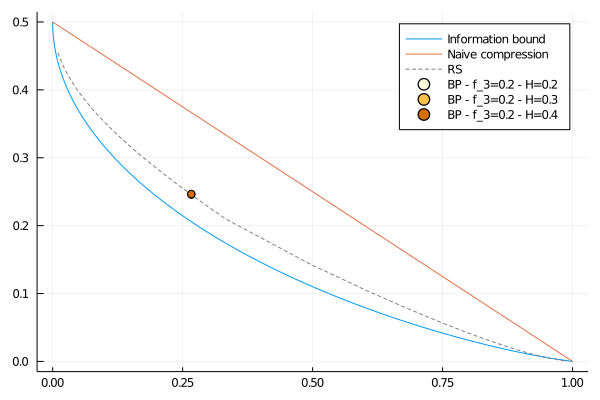

In [172]:
println("Avg over $navg instances")
colors = cgrad(:heat, length(Hs3)+1, categorical = true)
pl_f3 = plot_rdb()
for (i,H) in enumerate(Hs3)
    scatter!(pl_f3, [R], [mean(dist_f3[i])], 
        yerr = [std(dist_f3[i])/sqrt(length(dist_f3[i]))],
        label="BP - f_3=$(round(r,digits=1)) - H=$(round(H,sigdigits=2))", mc=colors[i], ms=4)
end
plot(pl_f3, size=(600,400), legend=:topright)
# xlims!((0.24,0.30)); ylims!((0.24,0.26))

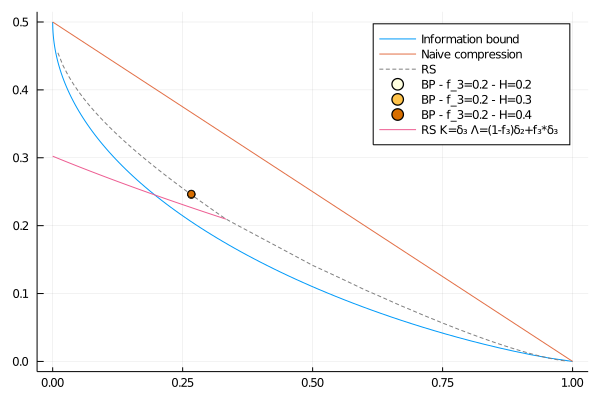

In [179]:
plot!(deepcopy(pl_f3), RR, DD, label="RS K=δ₃ Λ=(1-f₃)δ₂+f₃*δ₃")

In [171]:
length.(dist_f3)

3-element Array{Int64,1}:
 86
 90
 95

err = 9.799649980379854e-11
iter = 321
err = 9.914374876629495e-11
iter = 323
err = 9.309647497346418e-11
iter = 326
err = 9.450429327984011e-11
iter = 328
err = 9.607015183377143e-11
iter = 330
err = 9.780010135074235e-11
iter = 332
err = 9.970180236962278e-11
iter = 334
err = 9.456879723757083e-11
iter = 337
err = 9.672607159671998e-11
iter = 339
err = 9.906986342400614e-11
iter = 341
err = 9.45481470893128e-11
iter = 344
err = 9.715395155041051e-11
iter = 346
err = 9.996825589553282e-11
iter = 348
err = 9.598410954936298e-11
iter = 351
err = 9.90809656542524e-11
iter = 353
err = 9.552686419667111e-11
iter = 356
err = 9.892109353870637e-11
iter = 358
err = 9.57651735689069e-11
iter = 361
err = 9.94777038521022e-11
iter = 363
err = 9.669554046354278e-11
iter = 366
err = 9.420303426210808e-11
iter = 369
err = 9.833128755687426e-11
iter = 371
err = 9.617978635745317e-11
iter = 374
err = 9.428396952060325e-11
iter = 377
err = 9.888662111379176e-11
iter = 379
err = 9.731893069186981e-11
i

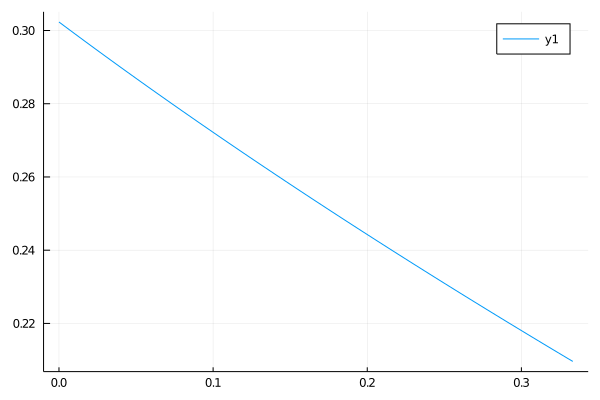

In [174]:
RR = Float64[]
DD = Float64[]
for rr in 0:0.01:1 
    r, d, p = RS(K,OffsetVector([0,0,1-rr,rr], 0:3), N=20, tol=1e-10, maxiter=10000)
    push!(RR,r); push!(DD,d)
end
plot(RR,DD)

In [151]:
R = 0.8/3
r = 1 - 3R

0.19999999999999996

In [155]:
m = factorial(6)*11
R = 0.8/3
r = 1 - 3R
n = round(Int, 3m/(2+r))
Λ = OffsetVector([0,0,1-r,r], 0:3)
K = OffsetVector([0,0,0,1], 0:3)
nedges = 3m
lambda, rho = nodes2edges(Λ[1:end], K[1:end])
Λ, K

([0.0, 0.0, 0.8, 0.19999999999999996], [0, 0, 0, 1])

In [169]:
n

1800